# 1 УРОК ПОСТРОЕНИЕ ДАШБОРДОВ

# Практика
В практической части этого урока мы продолжим анализировать наш сервис и рассчитаем несколько важных показателей, характеризующих его работу. 

Вам будет предложено написать несколько SQL-запросов и визуализировать их результат с помощью графиков в Redash. Проверяющая система по-прежнему будет оценивать корректность запросов, но сами графики проверяться не будут. Тем не менее, в каждом задании будут приведены примеры — вы можете построить точно такие же графики или придумать свои.

В конце урока из всех построенных графиков вы сможете собрать свой дашборд.

Желаем успехов!

## Задача 1.
Для начала давайте проанализируем, насколько быстро растёт аудитория нашего сервиса, и посмотрим на динамику числа пользователей и курьеров. 

Задание:

Для каждого дня, представленного в таблицах user_actions и courier_actions, рассчитайте следующие показатели:

Число новых пользователей.

Число новых курьеров.

Общее число пользователей на текущий день.

Общее число курьеров на текущий день.

Колонки с показателями назовите соответственно new_users, new_couriers, total_users, total_couriers. 
Колонку с датами назовите date. 

Проследите за тем, чтобы показатели были выражены целыми числами. Результат должен быть отсортирован по возрастанию даты.

Поля в результирующей таблице: date, new_users, new_couriers, total_users, total_couriers

Пояснение: 

Новыми будем считать тех пользователей и курьеров, которые в данный день совершили своё первое действие в нашем сервисе. Общее число пользователей/курьеров на текущий день — это результат сложения числа новых пользователей/курьеров в текущий день со значениями аналогичного показателя всех предыдущих дней.

#### Подсказка на случай, если совсем не получается

Чтобы посчитать количество новых пользователей/курьеров на каждую дату, сначала необходимо для каждого пользователя/курьера определить минимальную дату, то есть дату первого действия в нашем сервисе. Затем нужно произвести группировку и для каждой полученной даты посчитать число пользователей/курьеров с этой датой. Далее к полученной таблице достаточно применить оконную функцию и для каждой даты вычислить накопительную сумму числа пользователей/курьеров.

После того как составите запрос, попробуйте визуализировать результаты и постройте графики, отражающие динамику рассчитанных показателей.

Предлагаем вам построить два графика: на один поместить динамику новых пользователей и курьеров, а на второй — рост их общего числа.

###### Примеры графиков:

Динамика новых пользователей и курьеров:

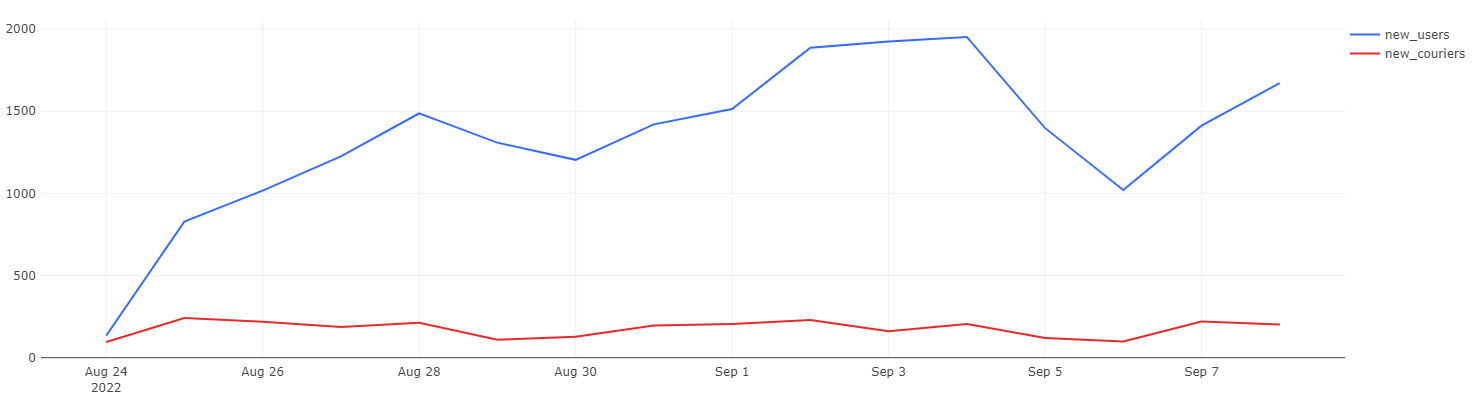

###### Динамика общего числа пользователей:


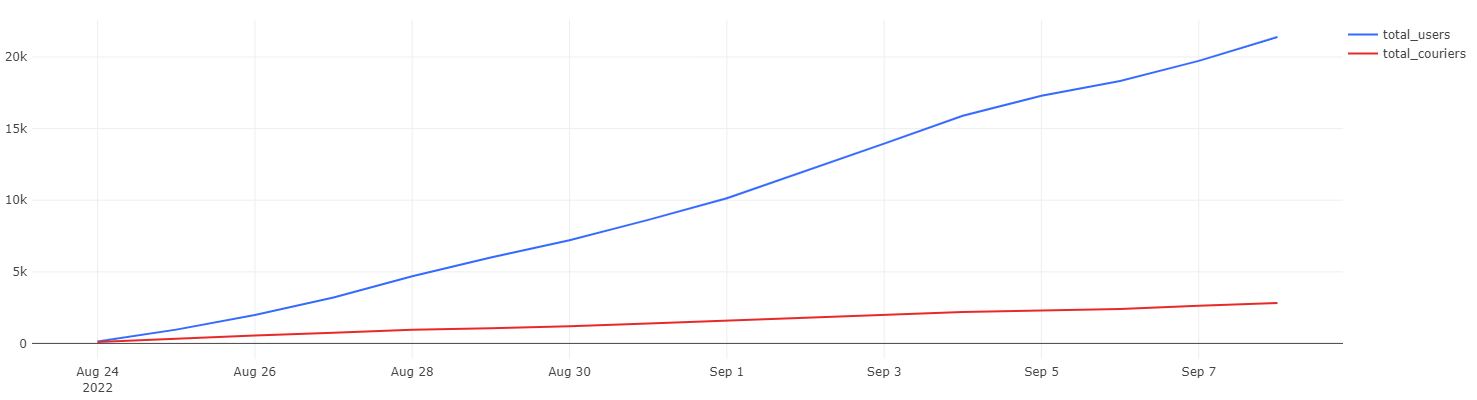


Проанализируйте построенные графики и попробуйте ответить на следующие вопросы:

- Что растёт быстрее: количество пользователей или количество курьеров?
- Насколько стабильны показатели числа новых пользователей и курьеров? Нет ли в данных таких дней, когда показатели сильно выбивались из общей динамики?
- Можно ли сказать, что показатель числа новых курьеров более стабилен, чем показатель числа новых пользователей?

# ОТВЕТ:

In [ ]:
# мое решение
SELECT date,
    COUNT(DISTINCT(user_id)) AS new_users,
    COUNT(DISTINCT(courier_id)) AS new_couriers,
    SUM(COUNT(DISTINCT(user_id))) OVER(ORDER BY date)::integer AS total_users,
    SUM(COUNT(DISTINCT(courier_id))) OVER(ORDER BY date)::integer AS total_couriers
FROM(
    SELECT MIN(time::date) AS date,
       user_id
    FROM user_actions
    GROUP BY 2
    ) z1
JOIN  
    (
    SELECT MIN(time::date) AS date,
       courier_id
    FROM courier_actions
    GROUP BY 2
    ) z2
USING(date)
GROUP BY 1

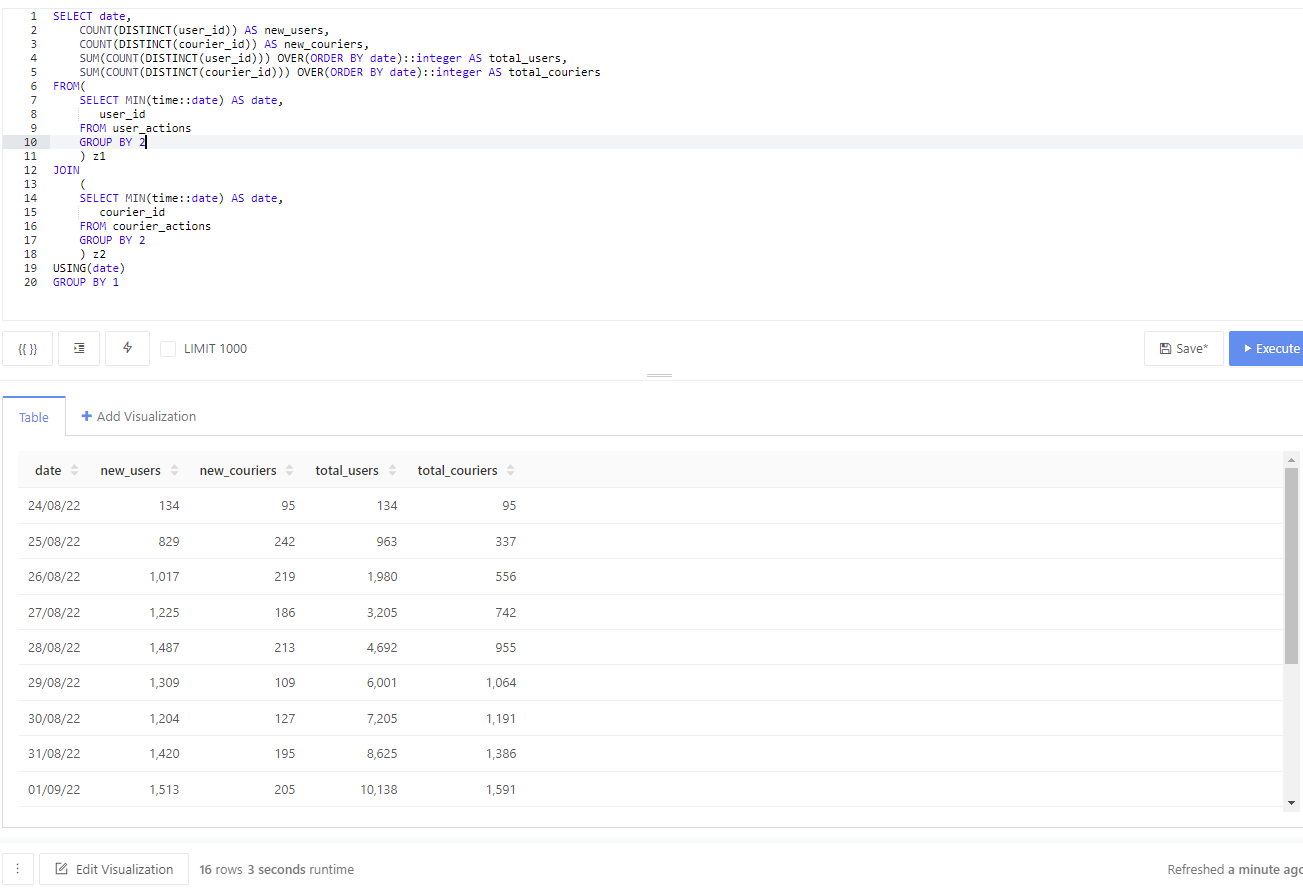

In [ ]:
# подсказка после решения
SELECT start_date as date,
       new_users,
       new_couriers,
       (sum(new_users) OVER (ORDER BY start_date))::int as total_users,
       (sum(new_couriers) OVER (ORDER BY start_date))::int as total_couriers
FROM   (SELECT start_date,
               count(courier_id) as new_couriers
        FROM   (SELECT courier_id,
                       min(time::date) as start_date
                FROM   courier_actions
                GROUP BY courier_id) t1
        GROUP BY start_date) t2
    LEFT JOIN (SELECT start_date,
                      count(user_id) as new_users
               FROM   (SELECT user_id,
                              min(time::date) as start_date
                       FROM   user_actions
                       GROUP BY user_id) t3
               GROUP BY start_date) t4 using (start_date)

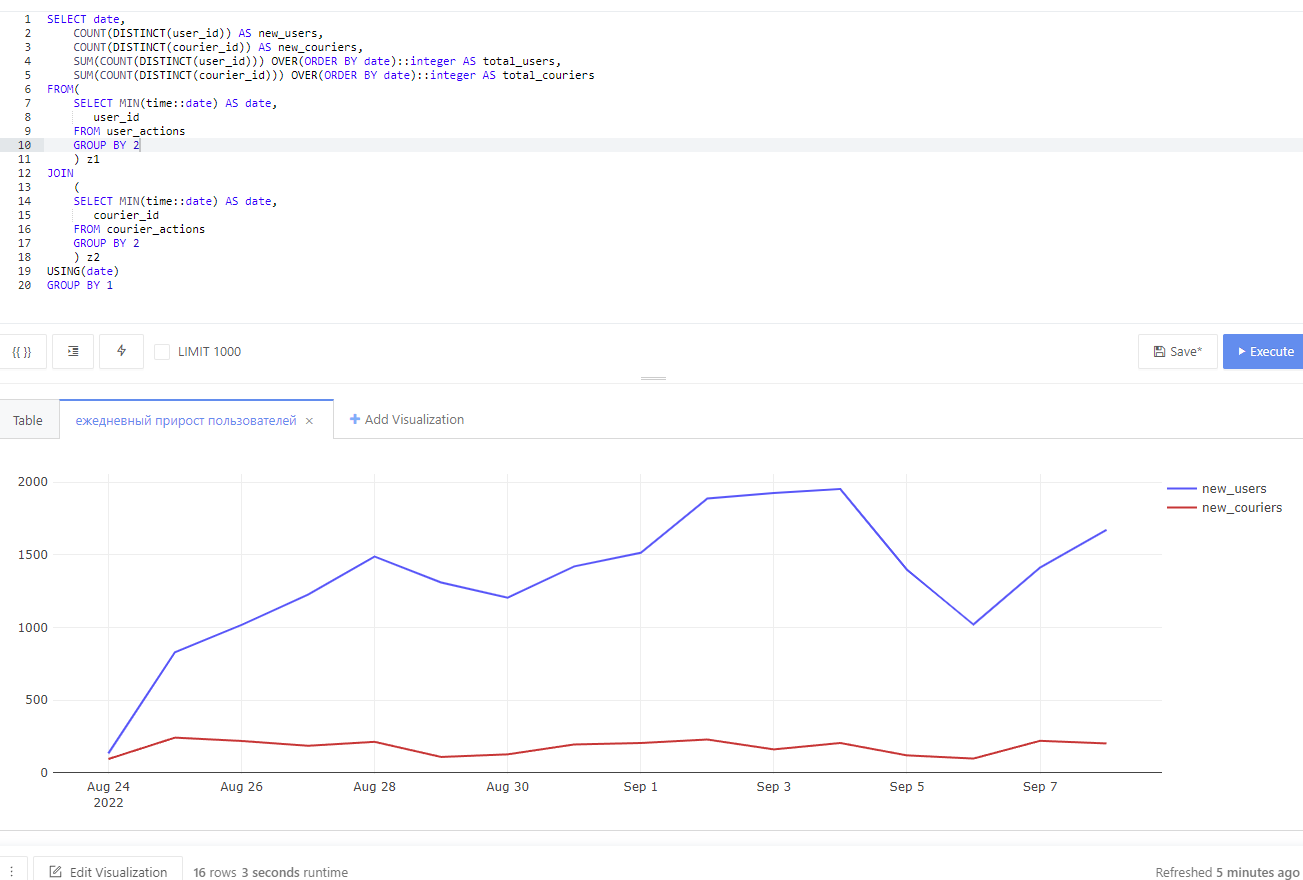

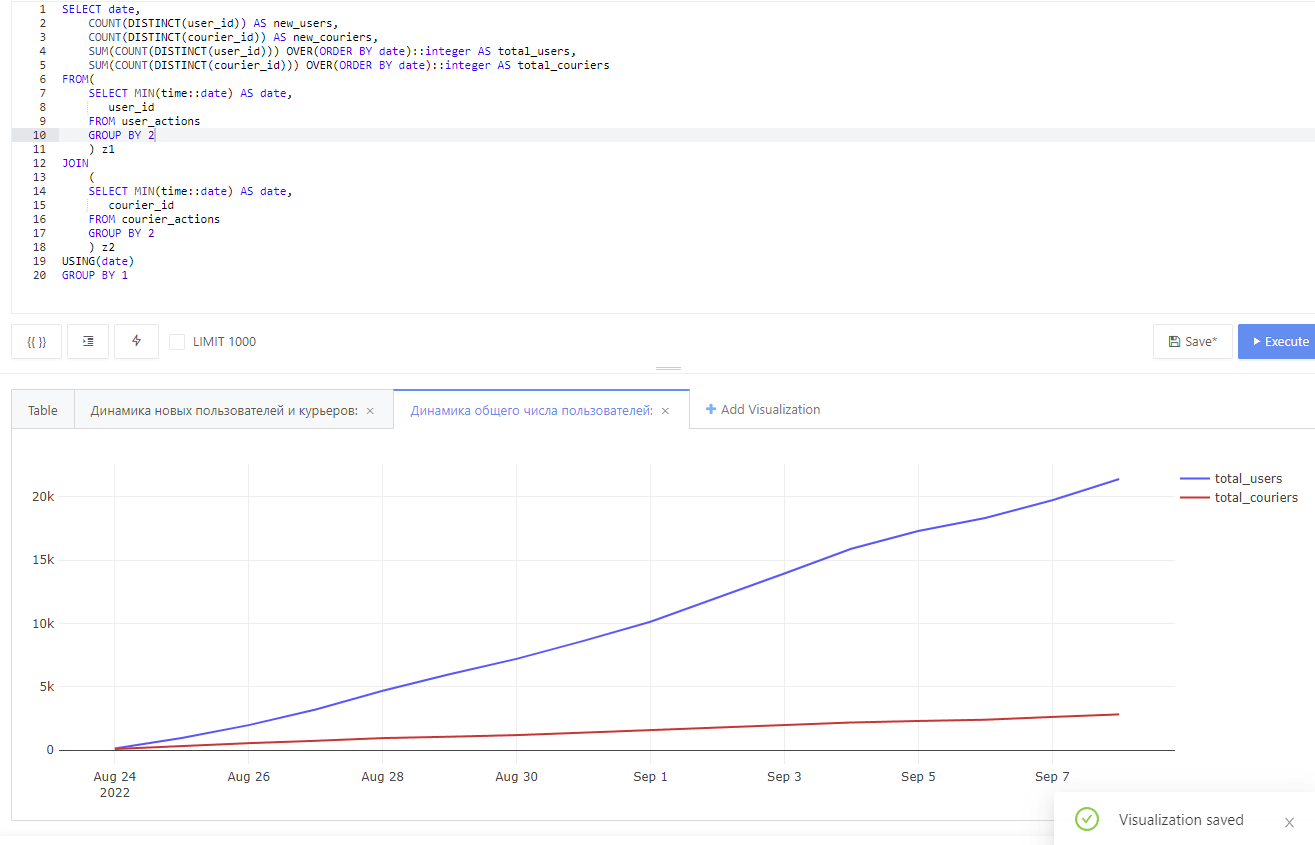

## Задача 2.
Анализируя динамику показателей из предыдущего задания, вы могли заметить, что сравнивать абсолютные значения не очень удобно. Давайте посчитаем динамику показателей в относительных величинах.

Задание:

Дополните запрос из предыдущего задания и теперь для каждого дня, представленного в таблицах user_actions и courier_actions, дополнительно рассчитайте следующие показатели:

- Прирост числа новых пользователей.
- Прирост числа новых курьеров.
- Прирост общего числа пользователей.
- Прирост общего числа курьеров.
- Показатели, рассчитанные на предыдущем шаге, также включите в результирующую таблицу.

Колонки с новыми показателями назовите соответственно new_users_change, new_couriers_change, total_users_growth, total_couriers_growth. Колонку с датами назовите date.

Все показатели прироста считайте в процентах относительно значений в предыдущий день. При расчёте показателей округляйте значения до двух знаков после запятой.

Результирующая таблица должна быть отсортирована по возрастанию даты.

Поля в результирующей таблице: 

date, new_users, new_couriers, total_users, total_couriers, 

new_users_change, new_couriers_change, total_users_growth, total_couriers_growth

Пояснение:

Не забывайте при делении заранее приводить значения к нужному типу данных. Пропущенные значения приростов для самой первой даты не заполняйте — просто оставьте поля в этой строке пустыми.

###### Подсказка на случай, если совсем не получается

Для расчёта приростов воспользуйтесь оконными функциями и функциями смещения.

После того как составите запрос, попробуйте визуализировать результаты и постройте графики, отражающие динамику рассчитанных показателей.

Предлагаем вам снова построить два графика: на один поместить приросты числа новых пользователей и курьеров, а на второй — приросты общего числа пользователей и курьеров. В данном случае для визуализации рекомендуем использовать столбиковые диаграммы (барчарты). Чтобы создать такую диаграмму, необходимо выбрать Bar в поле Chart Type.

##### Примеры графиков:

Динамика прироста числа новых пользователей и курьеров:

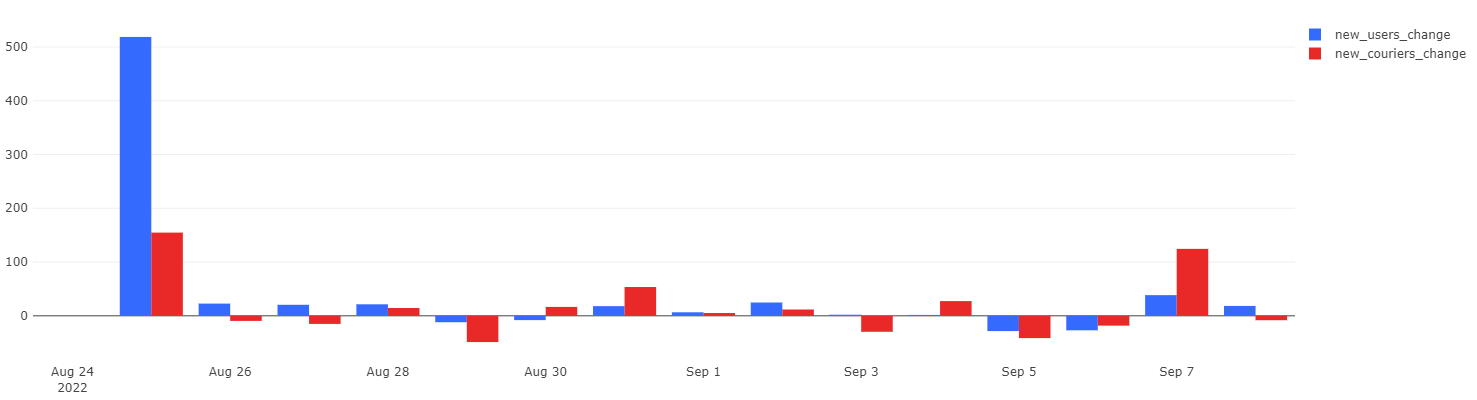

##### Динамика прироста общего числа пользователей и курьеров: 

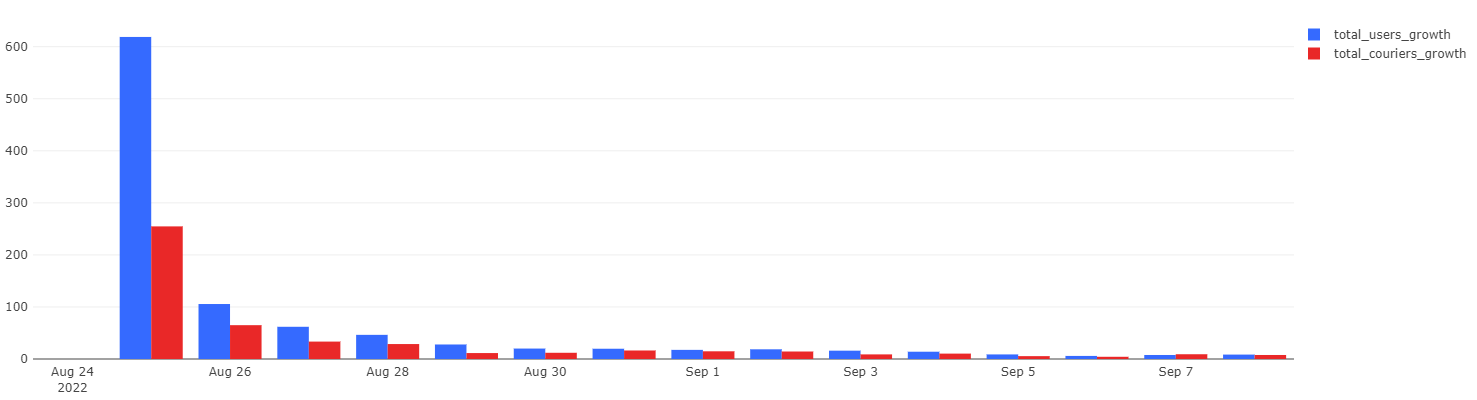

Проанализируйте построенные графики и попробуйте ответить на следующие вопросы:

Как изменились темпы прироста общего числа пользователей и курьеров за рассматриваемый промежуток времени? Какая в целом динамика у этих показателей: они растут или, наоборот, затухают?
В какие дни темп прироста числа новых курьеров заметно опережал темп прироста числа новых пользователей?
Можно ли, глядя на графики с относительными показателями, сказать, что показатель числа новых курьеров более стабилен, чем показатель числа новых пользователей?


# ОТВЕТ:

In [ ]:
# Мое решение
SELECT date, new_users, new_couriers, total_users, total_couriers, 
        ROUND(100.0 *(new_users - LAG(new_users,1) OVER (ORDER BY date))/ (LAG(new_users,1) OVER ()), 2) AS new_users_change,
        ROUND(100.0 *(new_couriers - LAG(new_couriers,1) OVER (ORDER BY date))/ (LAG(new_couriers,1) OVER ()), 2) AS new_couriers_change,
        ROUND(100.0*(total_users - LAG(total_users,1) OVER (ORDER BY date))/ (LAG(total_users,1) OVER ()),2) AS total_users_growth,
        ROUND(100.0*(total_couriers - LAG(total_couriers,1) OVER (ORDER BY date))/ (LAG(total_couriers,1) OVER ()),2) AS total_couriers_growth

FROM
    (SELECT date,
        COUNT(DISTINCT(user_id)) AS new_users,
        COUNT(DISTINCT(courier_id)) AS new_couriers,
        SUM(COUNT(DISTINCT(user_id))) OVER(ORDER BY date)::integer AS total_users,
        SUM(COUNT(DISTINCT(courier_id))) OVER(ORDER BY date)::integer AS total_couriers
    FROM(
        SELECT MIN(time::date) AS date,
           user_id
        FROM user_actions
        GROUP BY 2
        ) z1
    JOIN  
        (
        SELECT MIN(time::date) AS date,
           courier_id
        FROM courier_actions
        GROUP BY 2
        ) z2
    USING(date)
    GROUP BY 1
    ) t1

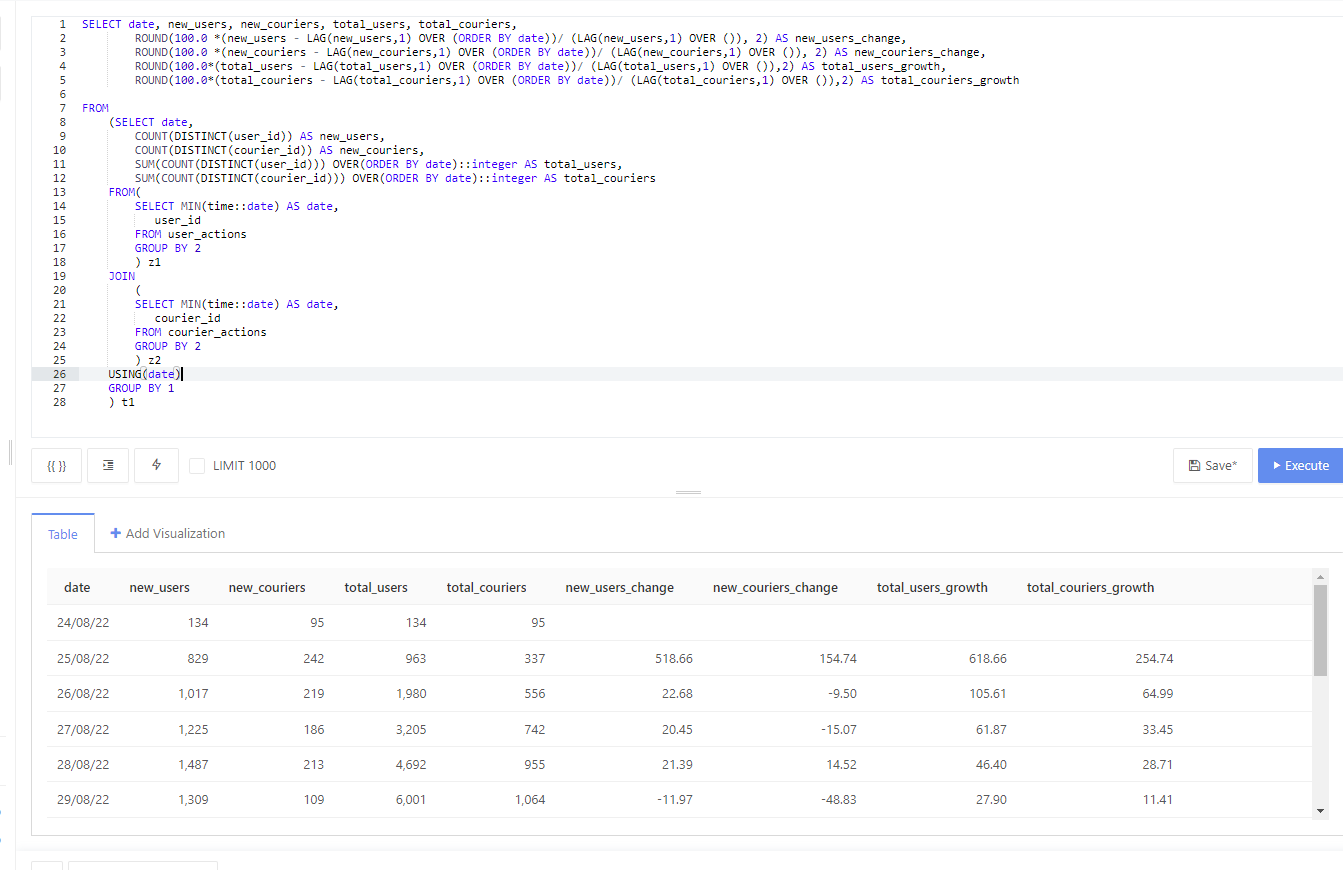

In [ ]:
# Подсказка после решения
SELECT date,
       new_users,
       new_couriers,
       total_users,
       total_couriers,
       round(100 * (new_users - lag(new_users, 1) OVER (ORDER BY date)) / lag(new_users, 1) OVER (ORDER BY date)::decimal,
             2) as new_users_change,
       round(100 * (new_couriers - lag(new_couriers, 1) OVER (ORDER BY date)) / lag(new_couriers, 1) OVER (ORDER BY date)::decimal,
             2) as new_couriers_change,
       round(100 * new_users::decimal / lag(total_users, 1) OVER (ORDER BY date),
             2) as total_users_growth,
       round(100 * new_couriers::decimal / lag(total_couriers, 1) OVER (ORDER BY date),
             2) as total_couriers_growth
FROM   (SELECT start_date as date,
               new_users,
               new_couriers,
               (sum(new_users) OVER (ORDER BY start_date))::int as total_users,
               (sum(new_couriers) OVER (ORDER BY start_date))::int as total_couriers
        FROM   (SELECT start_date,
                       count(courier_id) as new_couriers
                FROM   (SELECT courier_id,
                               min(time::date) as start_date
                        FROM   courier_actions
                        GROUP BY courier_id) t1
                GROUP BY start_date) t2
            LEFT JOIN (SELECT start_date,
                              count(user_id) as new_users
                       FROM   (SELECT user_id,
                                      min(time::date) as start_date
                               FROM   user_actions
                               GROUP BY user_id) t3
                       GROUP BY start_date) t4 using (start_date)) t5

In [ ]:
# чужое
WITH
  users_min_dates AS (
    SELECT
      MIN(time)::DATE AS date
    FROM
      user_actions
    GROUP BY 
      user_id
  ),
  
  users_counts_by_date AS (
    SELECT
      date,
      COUNT(*) new_users
    FROM 
      users_min_dates
    GROUP BY
      date
  ), 
  
  couriers_min_dates AS (
    SELECT
      MIN(time)::DATE AS date
    FROM
      courier_actions
    GROUP BY 
      courier_id
  ),
  
  couriers_counts_by_date AS (
    SELECT
      date,
      COUNT(*) new_couriers
    FROM 
      couriers_min_dates
    GROUP BY
      date
  ),
  
  amount_table AS (
    SELECT
      date,
      new_users,
      new_couriers,
      (SUM(new_users) OVER(ORDER BY date))::INTEGER total_users,
      (SUM(new_couriers) OVER(ORDER BY date))::INTEGER total_couriers
    FROM
      users_counts_by_date u
      INNER JOIN couriers_counts_by_date USING(date)
  )

SELECT
  date,
  new_users,
  new_couriers,
  total_users,
  total_couriers,
  ROUND(100.0 * (new_users - LAG(new_users) OVER()) / LAG(new_users) OVER(), 2) new_users_change,
  ROUND(100.0 * (new_couriers - LAG(new_couriers) OVER()) / LAG(new_couriers) OVER(), 2) new_couriers_change, 
  ROUND(100.0 * (total_users - LAG(total_users) OVER()) / LAG(total_users) OVER(), 2) total_users_growth, 
  ROUND(100.0 * (total_couriers - LAG(total_couriers) OVER()) / LAG(total_couriers) OVER(), 2) total_couriers_growth
FROM
  amount_table 

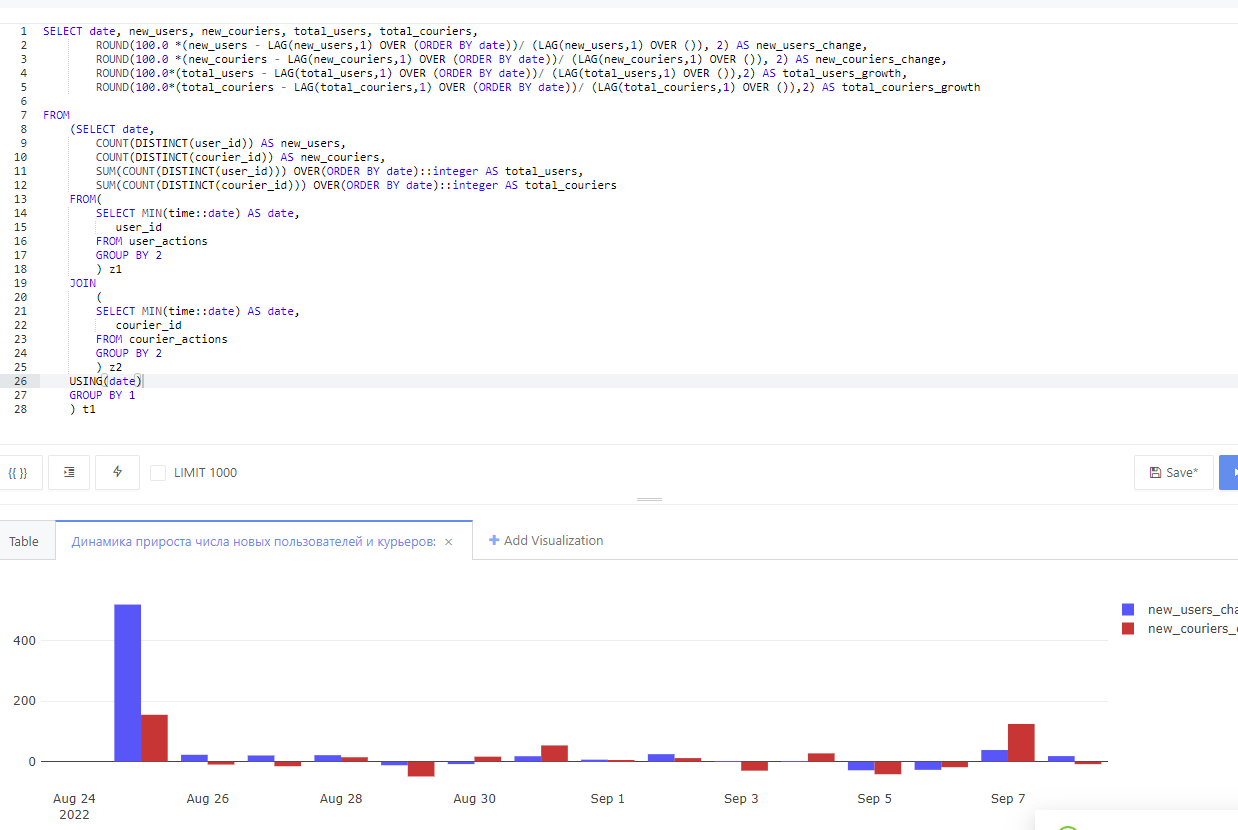

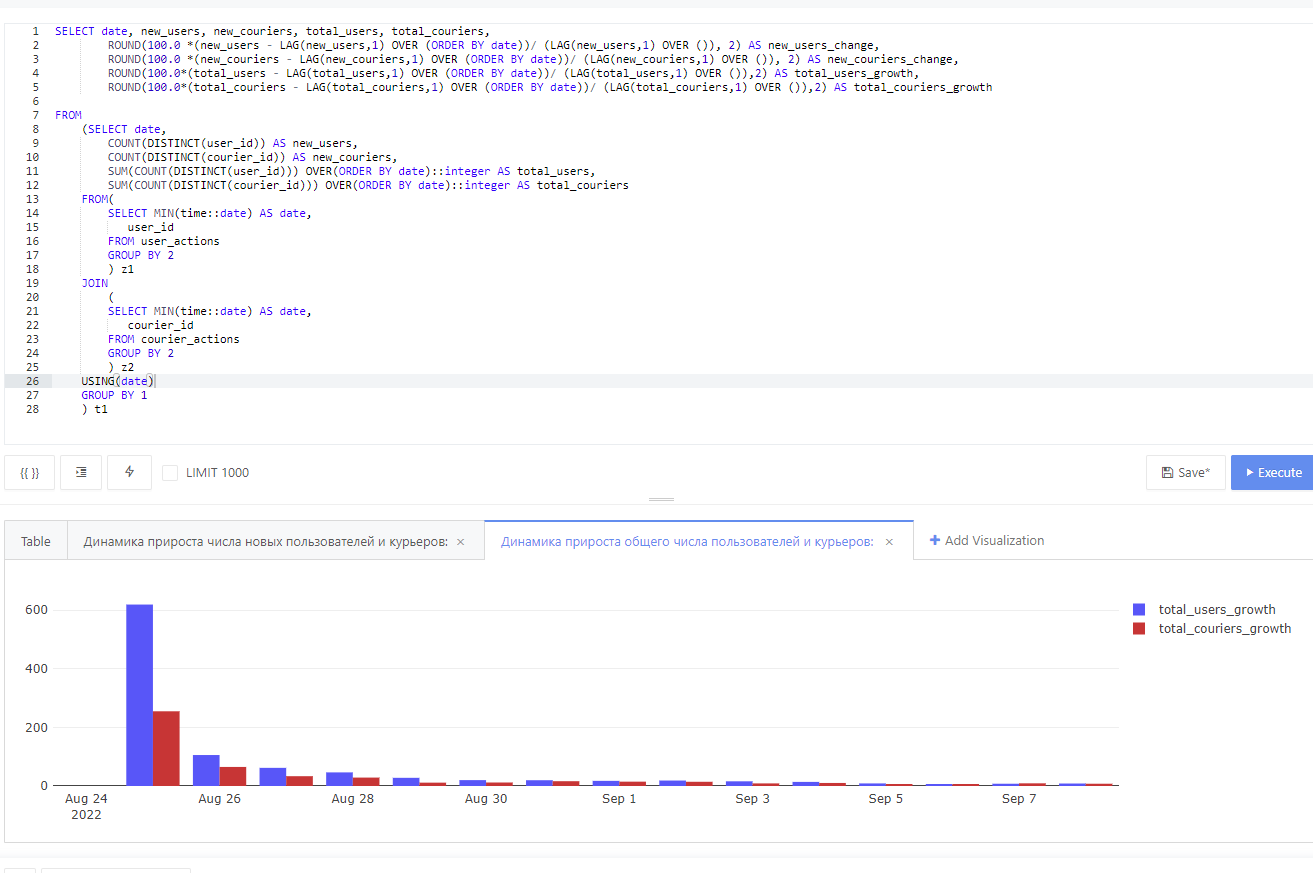

## Задача 3.
Теперь предлагаем вам посмотреть на нашу аудиторию немного под другим углом — давайте посчитаем не просто всех пользователей, а именно ту часть, которая оформляет и оплачивает заказы в нашем сервисе. Заодно выясним, какую долю платящие пользователи составляют от их общего числа.

Задание:

Для каждого дня, представленного в таблицах user_actions и courier_actions, рассчитайте следующие показатели:

    Число платящих пользователей.
    Число активных курьеров.
    Долю платящих пользователей в общем числе пользователей на текущий день.
    Долю активных курьеров в общем числе курьеров на текущий день.
Колонки с показателями назовите соответственно paying_users, active_couriers, paying_users_share, active_couriers_share. Колонку с датами назовите date. Проследите за тем, чтобы абсолютные показатели были выражены целыми числами. Все показатели долей необходимо выразить в процентах. При их расчёте округляйте значения до двух знаков после запятой.

Результат должен быть отсортирован по возрастанию даты. 

Поля в результирующей таблице: date, paying_users, active_couriers, paying_users_share, active_couriers_share

Пояснение: 

Платящими будем считать тех пользователей, которые в данный день оформили хотя бы один заказ, который в дальнейшем не был отменен.

Курьеров будем считать активными, если в данный день они приняли хотя бы один заказ, который был доставлен (возможно, уже на следующий день), или доставили любой заказ.

Общее число пользователей/курьеров на текущий день — это по-прежнему результат сложения числа новых пользователей/курьеров в текущий день со значениями аналогичного показателя всех предыдущих дней. Мы считали этот показатель на предыдущих шагах.

Не забывайте при делении заранее приводить значения к нужному типу данных. 

##### Подсказка на случай, если совсем не получается

Для решения задачи необходимо сначала для каждого дня посчитать число платящих пользователей и активных курьеров, а затем объединить полученные таблицы с данными об общем числе пользователей и курьеров на текущую дату и далее рассчитать все необходимые относительные показатели. Общее число пользователей и курьеров на текущую дату мы уже считали в первой задаче, можете воспользоваться запросом из этого задания.

После того как составите запрос, попробуйте визуализировать результаты и постройте графики, отражающие динамику рассчитанных показателей.

Предлагаем вам построить два графика: на один поместить динамику платящих пользователей и активных курьеров, а на второй — доли платящих пользователей и активных курьеров в их общем числе.

In [ ]:
# мое решение
SELECT date,paying_users,active_couriers,
    ROUND(100.0 * paying_users/total_users, 2) AS paying_users_share,
    ROUND(100.0 * active_couriers/total_couriers, 2) AS active_couriers_share
FROM
    (SELECT time::date AS date, COUNT(DISTINCT(user_id)) AS paying_users
    FROM user_actions
    WHERE action = 'create_order' AND order_id NOT IN (SELECT order_id FROM user_actions WHERE action = 'cancel_order')
    GROUP BY 1)t1
LEFT JOIN   
    (SELECT time::date AS date, COUNT(DISTINCT(courier_id)) AS active_couriers
    FROM courier_actions
    WHERE action = 'accept_order' AND order_id  IN (SELECT order_id FROM courier_actions WHERE action = 'deliver_order') OR action = 'deliver_order'
    GROUP BY 1) t2
USING (date)
LEFT JOIN
    (SELECT date, COUNT(DISTINCT(user_id)) AS new_users,
        COUNT(DISTINCT(courier_id)) AS new_couriers,
        SUM(COUNT(DISTINCT(user_id))) OVER(ORDER BY date)::integer AS total_users,
        SUM(COUNT(DISTINCT(courier_id))) OVER(ORDER BY date)::integer AS total_couriers
    FROM(
        SELECT MIN(time::date) AS date, user_id
        FROM user_actions
        GROUP BY 2
        ) z1
    JOIN  
        (
        SELECT MIN(time::date) AS date, courier_id
        FROM courier_actions
        GROUP BY 2
        ) z2
    USING(date)
    GROUP BY 1
    ) t3
USING (date) 
ORDER BY 1

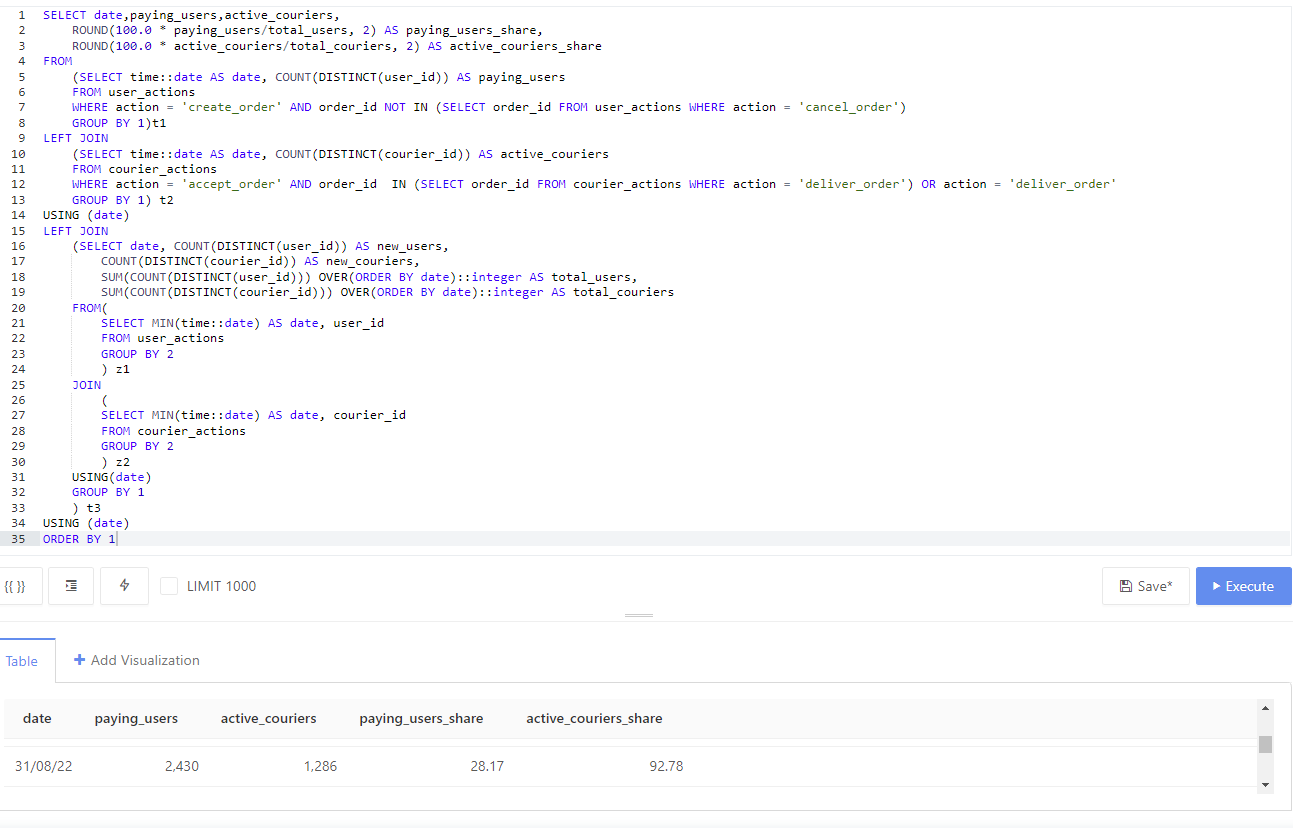

In [ ]:
# Вариант решения подсказка после решения
SELECT date,
       paying_users,
       active_couriers,
       round(100 * paying_users::decimal / total_users, 2) as paying_users_share,
       round(100 * active_couriers::decimal / total_couriers, 2) as active_couriers_share
FROM   (SELECT start_date as date,
               new_users,
               new_couriers,
               (sum(new_users) OVER (ORDER BY start_date))::int as total_users,
               (sum(new_couriers) OVER (ORDER BY start_date))::int as total_couriers
        FROM   (SELECT start_date,
                       count(courier_id) as new_couriers
                FROM   (SELECT courier_id,
                               min(time::date) as start_date
                        FROM   courier_actions
                        GROUP BY courier_id) t1
                GROUP BY start_date) t2
            LEFT JOIN (SELECT start_date,
                              count(user_id) as new_users
                       FROM   (SELECT user_id,
                                      min(time::date) as start_date
                               FROM   user_actions
                               GROUP BY user_id) t3
                       GROUP BY start_date) t4 using (start_date)) t5
    LEFT JOIN (SELECT time::date as date,
                      count(distinct courier_id) as active_couriers
               FROM   courier_actions
               WHERE  order_id not in (SELECT order_id
                                       FROM   user_actions
                                       WHERE  action = 'cancel_order')
               GROUP BY date) t6 using (date)
    LEFT JOIN (SELECT time::date as date,
                      count(distinct user_id) as paying_users
               FROM   user_actions
               WHERE  order_id not in (SELECT order_id
                                       FROM   user_actions
                                       WHERE  action = 'cancel_order')
               GROUP BY date) t7 using (date)

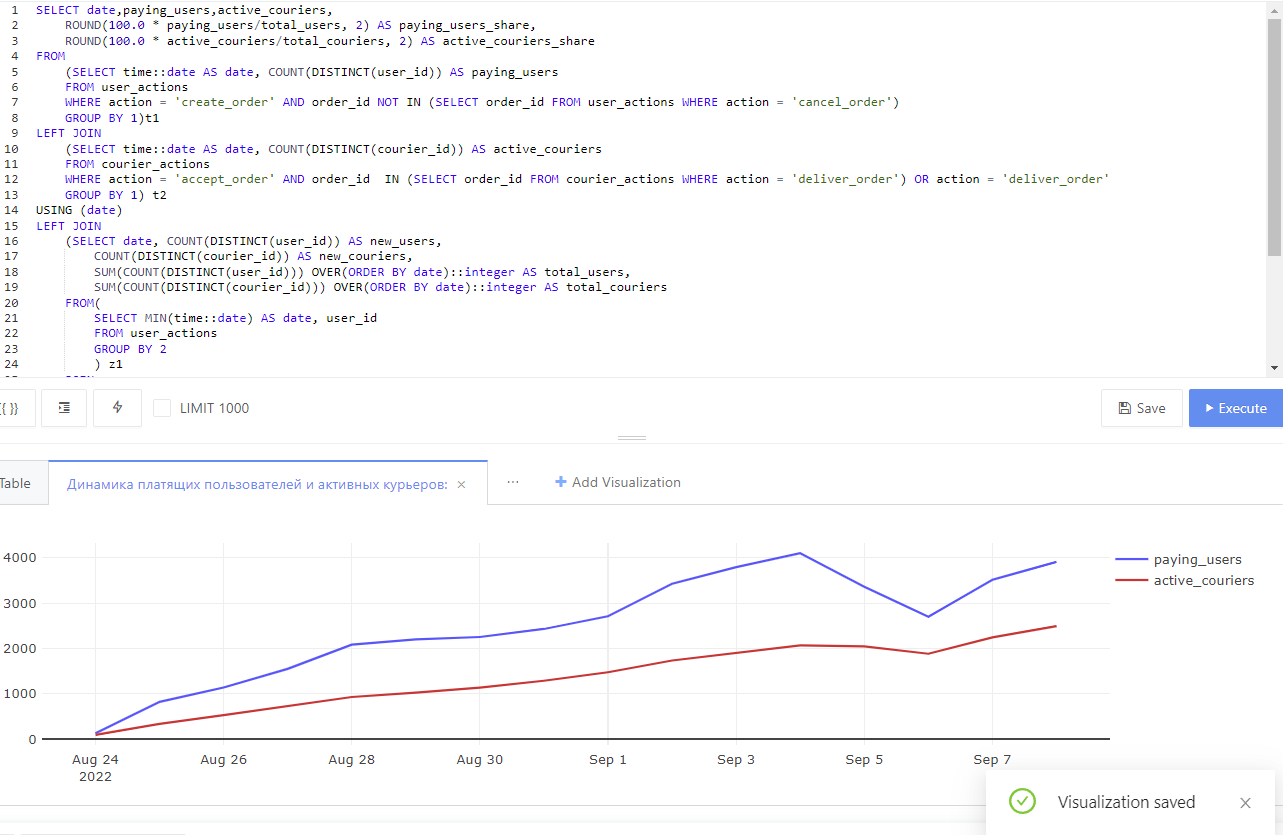

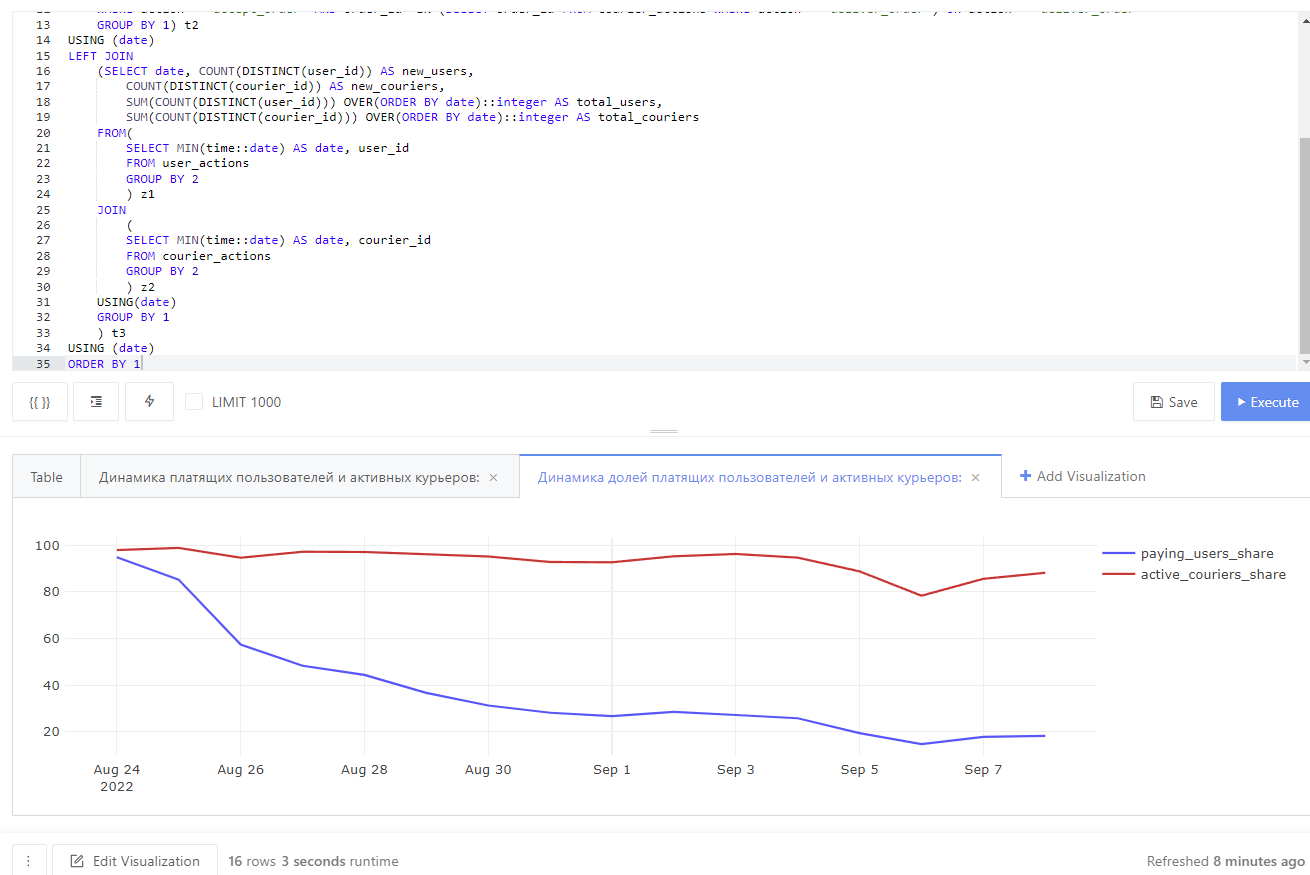

## Задача 4.
Давайте подробнее остановимся на платящих пользователях, копнём немного глубже и выясним, как много платящих пользователей совершают более одного заказа в день. В конце концов нам важно понимать, как в большинстве своём ведут себя наши пользователи — они заходят в приложение, чтобы сделать всего один заказ, или же наш сервис настолько хорош, что они готовы пользоваться им несколько раз в день.

Задание:

Для каждого дня, представленного в таблице user_actions, рассчитайте следующие показатели:

    Долю пользователей, сделавших в этот день всего один заказ, в общем количестве платящих пользователей.
    Долю пользователей, сделавших в этот день несколько заказов, в общем количестве платящих пользователей.
Колонки с показателями назовите соответственно single_order_users_share, several_orders_users_share. Колонку с датами назовите date. Все показатели с долями необходимо выразить в процентах. При расчёте долей округляйте значения до двух знаков после запятой.

Результат должен быть отсортирован по возрастанию даты.

Поля в результирующей таблице: date, single_order_users_share, several_orders_users_share

Пояснение: 

Платящими по-прежнему считаем тех пользователей, которые в данный день оформили (и не отменили) хотя бы один заказ.

Не забывайте при делении заранее приводить значения к нужному типу данных.

#### Подсказка на случай, если совсем не получается

Для решения задачи сначала необходимо для каждого дня отдельно рассчитать общее число платящих пользователей, число пользователей с одним заказом и число пользователей с несколькими заказами. Затем необходимо объединить таблицы с этими данными по дате и посчитать все необходимые показатели.

После того как составите запрос, попробуйте визуализировать результаты и постройте график, отражающий динамику рассчитанных показателей.

Поскольку в сумме оба показателя дают 100%, рекомендуем использовать столбчатую диаграмму. Чтобы столбцы были расположены друг над другом, во вкладке General в разделе Stacking можно указать параметр Stack.

###### Проанализируйте построенные графики и попробуйте ответить на следующие вопросы:

    На каком уровне в среднем держится доля пользователей с несколькими заказами?
    Можно ли считать значение показателя в первый день аномально низким, если принять во внимание общее количество пользователей в этот день?


In [ ]:
# мое решение
SELECT date,
    ROUND(100.0 * single_order/paying_users, 2)  AS single_order_users_share,
    100 - ROUND(100.0 * single_order/paying_users, 2) AS several_orders_users_share
FROM
    (SELECT time::date as date, count(distinct user_id) as paying_users
    FROM   user_actions
    WHERE  order_id not in (SELECT order_id FROM   user_actions WHERE  action = 'cancel_order')
    GROUP BY date)t1
LEFT JOIN
    (SELECT date, COUNT(user_id) AS single_order
    FROM
        (SELECT time::date as date,user_id, COUNT(order_id) AS count_order
        FROM   user_actions
        WHERE  order_id not in (SELECT order_id FROM   user_actions WHERE  action = 'cancel_order')
        GROUP BY 1,2) z1
    WHERE count_order = 1
    GROUP BY 1)t2
USING(date)
ORDER BY 1

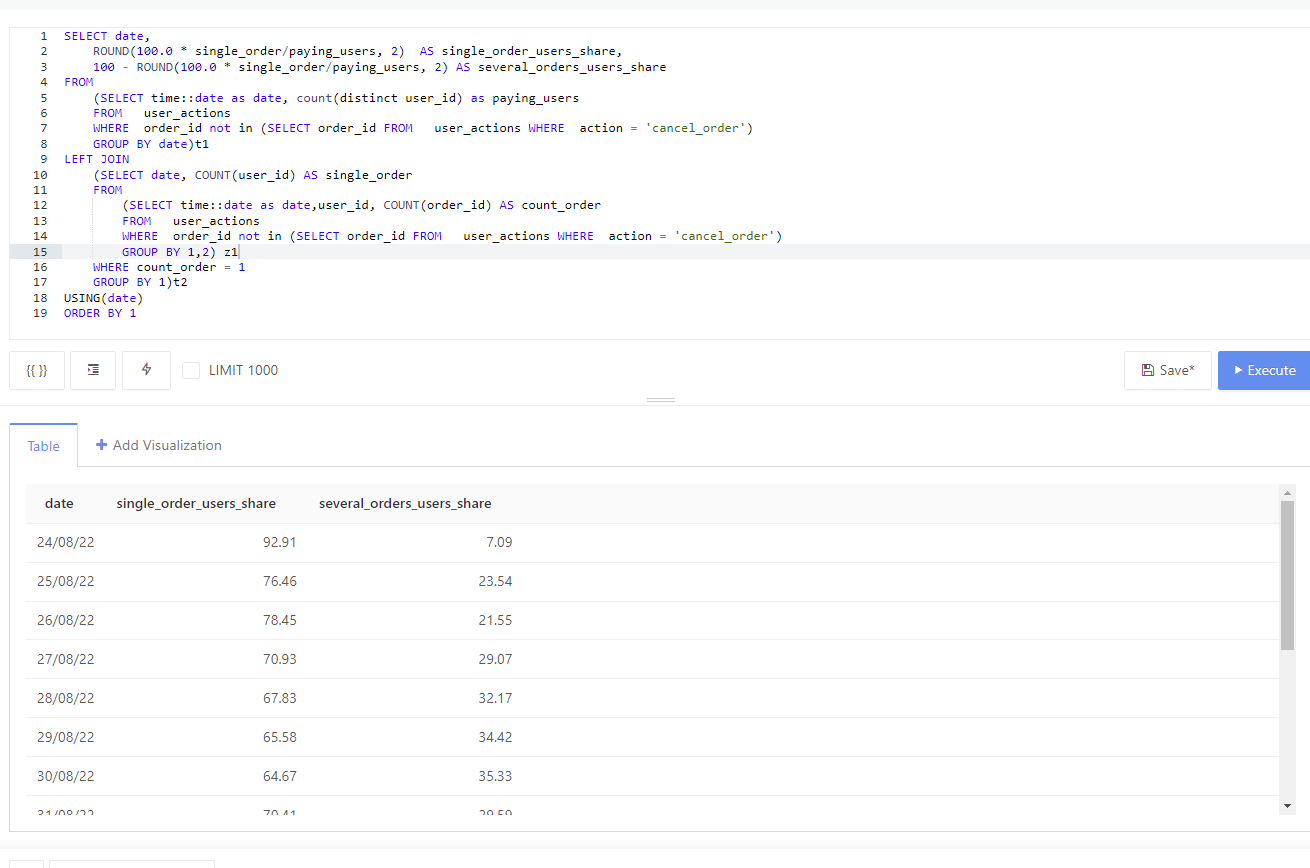

In [ ]:
# подсказка после решения
SELECT date,
       round(100 * single_order_users::decimal / paying_users,
             2) as single_order_users_share,
       100 - round(100 * single_order_users::decimal / paying_users,
                   2) as several_orders_users_share
FROM   (SELECT time::date as date,
               count(distinct user_id) as paying_users
        FROM   user_actions
        WHERE  order_id not in (SELECT order_id
                                FROM   user_actions
                                WHERE  action = 'cancel_order')
        GROUP BY date) t1
    LEFT JOIN (SELECT date,
                      count(user_id) as single_order_users
               FROM   (SELECT time::date as date,
                              user_id,
                              count(distinct order_id) as user_orders
                       FROM   user_actions
                       WHERE  order_id not in (SELECT order_id
                                               FROM   user_actions
                                               WHERE  action = 'cancel_order')
                       GROUP BY date, user_id having count(distinct order_id) = 1) t2
               GROUP BY date) t3 using (date)
ORDER BY date

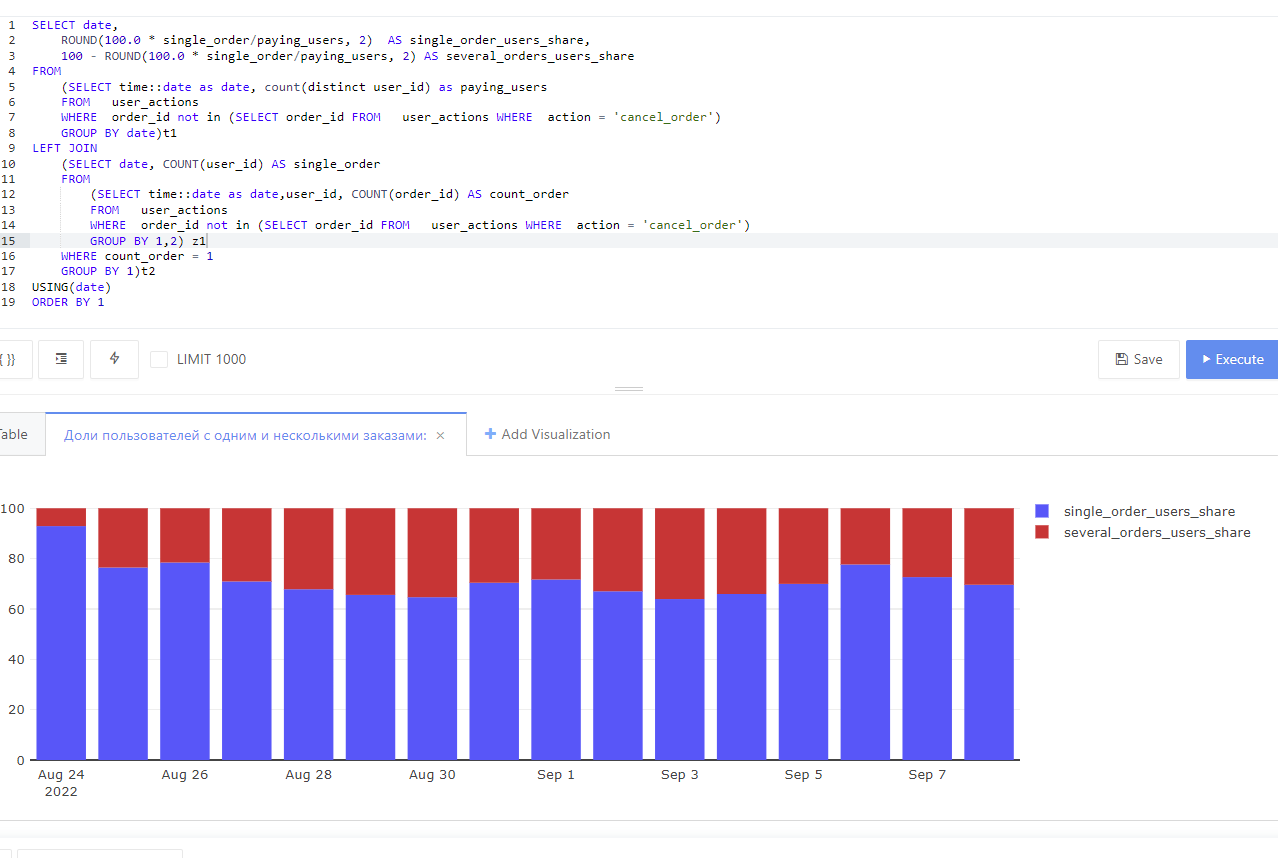

## * Задача 5.
Продолжим изучать наш сервис и рассчитаем несколько показателей, связанных с заказами.

Задание:

Для каждого дня, представленного в таблице user_actions, рассчитайте следующие показатели:

    Общее число заказов.
    Число первых заказов (заказов, сделанных пользователями впервые).
    Число заказов новых пользователей (заказов, сделанных пользователями в тот же день, когда они впервые воспользовались сервисом).
    Долю первых заказов в общем числе заказов (долю п.2 в п.1).
    Долю заказов новых пользователей в общем числе заказов (долю п.3 в п.1).
Колонки с показателями назовите соответственно orders, first_orders, new_users_orders, first_orders_share, new_users_orders_share. Колонку с датами назовите date. Проследите за тем, чтобы во всех случаях количество заказов было выражено целым числом. Все показатели с долями необходимо выразить в процентах. При расчёте долей округляйте значения до двух знаков после запятой.

Результат должен быть отсортирован по возрастанию даты.

Поля в результирующей таблице: date, orders, first_orders, new_users_orders, first_orders_share, new_users_orders_share

Пояснение: 

При расчёте числа первых заказов учитывайте, что у каждого пользователя может быть всего один первый заказ (что вполне логично).

При расчёте числа заказов новых пользователей учитывайте, что в свой первый день каждый новый пользователь мог как совершить сразу несколько заказов, так и не совершить ни одного.

Во всех случаях при расчёте числа заказов учитывайте только фактически совершённые заказы, отменённые заказы не учитывайте.

Не забывайте при делении заранее приводить значения к нужному типу данных.

##### Подсказка на случай, если совсем не получается

Для решения задачи сначала необходимо для каждого дня отдельно рассчитать общее число заказов, число первых заказов и число заказов новых пользователей, а затем объединить полученные таблицы в одну и посчитать все необходимые относительные показатели. Для расчёта числа первых заказов сперва для каждого пользователя нужно найти дату оформления первого неотменённого заказа и затем произвести группировку по дате, посчитав для каждого дня количество пользователей, сделавших первый заказ. Для расчёта числа заказов новых пользователей сначала нужно для каждого пользователя найти дату совершения первого действия, а затем дополнить эту таблицу данными о количестве заказов, сделанных пользователем в свой первый день. Это можно сделать, присоединив к таблице с датами первых действий таблицу с общим числом заказов на каждую дату для каждого пользователя. Обратите внимание, что в этой таблице для некоторых пользователей могут отсутствовать даты совершения первого действия, т.к. пользователь мог отменить заказ и фактически не совершить ни одной покупки в свой первый день. После объединения таблиц для таких дней с пропущенными значениями следует указать число заказов равным 0. Это можно сделать, например, с помощью функции COALESCE.

После того как составите запрос, попробуйте визуализировать результаты и постройте графики, отражающие динамику рассчитанных показателей.

##### Проанализируйте построенные графики и попробуйте ответить на следующие вопросы:

    Какая в целом динамика у абсолютных показателей? Можно ли сказать, что вместе с ростом количества всех заказов растут показатели числа первых заказов и числа заказов новых пользователей?
    Что можно сказать о динамике относительных показателей? Можно ли считать её в целом закономерной? Как, на ваш взгляд, будут вести себя эти показатели в долгосрочной перспективе: они будут расти или снижаться?

In [ ]:
# Мое вымученное)))
SELECT date, orders, first_orders, new_users_orders,
        ROUND(100.0 * first_orders/orders,2) AS first_orders_share,
        ROUND(100.0 * new_users_orders/orders,2) AS new_users_orders_share
FROM
    (SELECT time::date AS date, COUNT(DISTINCT order_id) AS orders
    FROM user_actions
    WHERE order_id  NOT IN (SELECT order_id FROM user_actions WHERE action = 'cancel_order')
    GROUP BY 1)tt1
LEFT JOIN   
    (SELECT first_time_users::date AS date, COUNT(DISTINCT user_id) AS first_orders
    FROM    
        (SELECT user_id, MIN(time) AS first_time_users
        FROM user_actions
        WHERE order_id  NOT IN (SELECT order_id FROM user_actions WHERE action ='cancel_order')
        GROUP BY 1)t1
    GROUP BY 1)tt2
USING (date)
LEFT JOIN
    (SELECT date, SUM(orders_count)::int AS new_users_orders
    FROM
        (SELECT  date, user_id, orders_count -- это вроде здесь и не надоCOALESCE(orders_count,0) AS
        FROM    
            (SELECT user_id, MIN(time)::date AS date
            FROM user_actions
            -- с Этим неправильно считает WHERE order_id  NOT IN (SELECT order_id FROM user_actions WHERE action ='cancel_order')
            GROUP BY 1)z1
       LEFT JOIN
            (SELECT time::date AS date,  user_id, COUNT(DISTINCT order_id) AS orders_count
            FROM user_actions
            WHERE order_id  NOT IN (SELECT order_id FROM user_actions WHERE action ='cancel_order')
            GROUP BY 1,2)z2
        USING(date, user_id) )z3
    GROUP BY 1)tt3
USING (date)
ORDER BY 1
    

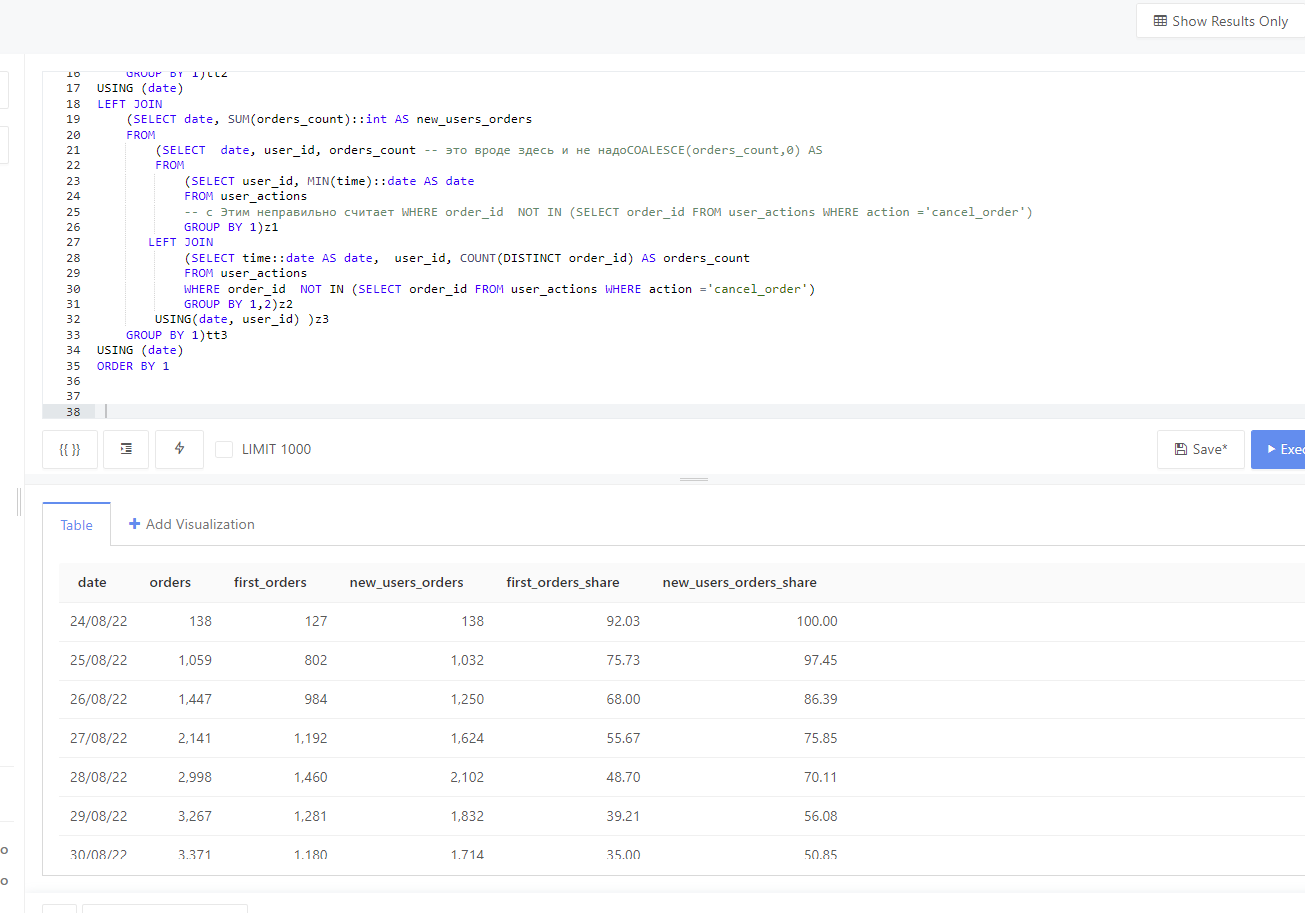

In [ ]:
# Вариант подсказка после решения
SELECT date,
       orders,
       first_orders,
       new_users_orders::int,
       round(100 * first_orders::decimal / orders, 2) as first_orders_share,
       round(100 * new_users_orders::decimal / orders, 2) as new_users_orders_share
FROM   (SELECT creation_time::date as date,
               count(distinct order_id) as orders
        FROM   orders
        WHERE  order_id not in (SELECT order_id
                                FROM   user_actions
                                WHERE  action = 'cancel_order')
           and order_id in (SELECT order_id
                         FROM   courier_actions
                         WHERE  action = 'deliver_order')
        GROUP BY date) t5
    LEFT JOIN (SELECT first_order_date as date,
                      count(user_id) as first_orders
               FROM   (SELECT user_id,
                              min(time::date) as first_order_date
                       FROM   user_actions
                       WHERE  order_id not in (SELECT order_id
                                               FROM   user_actions
                                               WHERE  action = 'cancel_order')
                       GROUP BY user_id) t4
               GROUP BY first_order_date) t7 using (date)
    LEFT JOIN (SELECT start_date as date,
                      sum(orders) as new_users_orders
               FROM   (SELECT t1.user_id,
                              t1.start_date,
                              coalesce(t2.orders, 0) as orders
                       FROM   (SELECT user_id,
                                      min(time::date) as start_date
                               FROM   user_actions
                               GROUP BY user_id) t1
                           LEFT JOIN (SELECT user_id,
                                             time::date as date,
                                             count(distinct order_id) as orders
                                      FROM   user_actions
                                      WHERE  order_id not in (SELECT order_id
                                                              FROM   user_actions
                                                              WHERE  action = 'cancel_order')
                                      GROUP BY user_id, date) t2
                               ON t1.user_id = t2.user_id and
                                  t1.start_date = t2.date) t3
               GROUP BY start_date) t6 using (date)
ORDER BY date

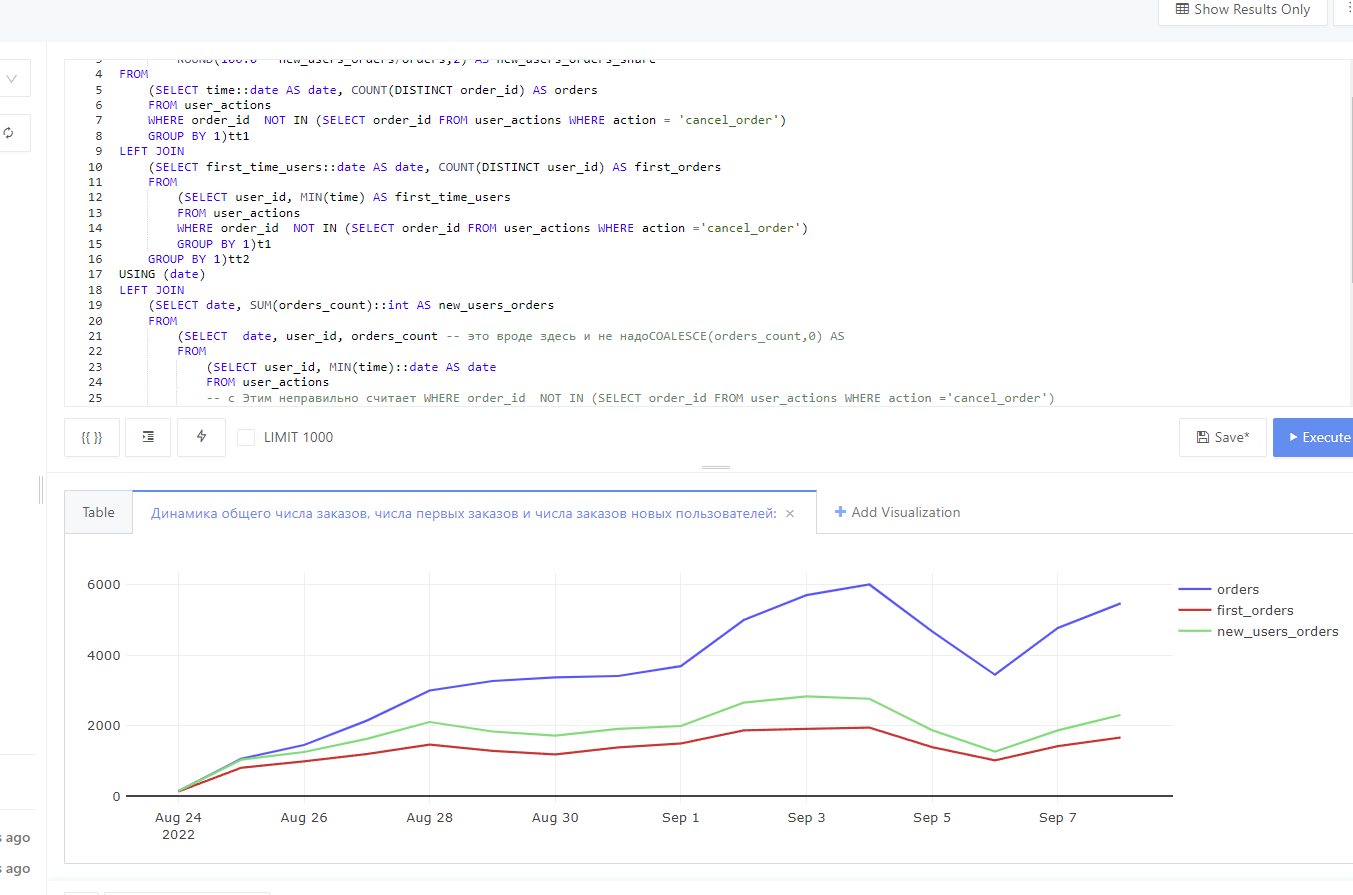

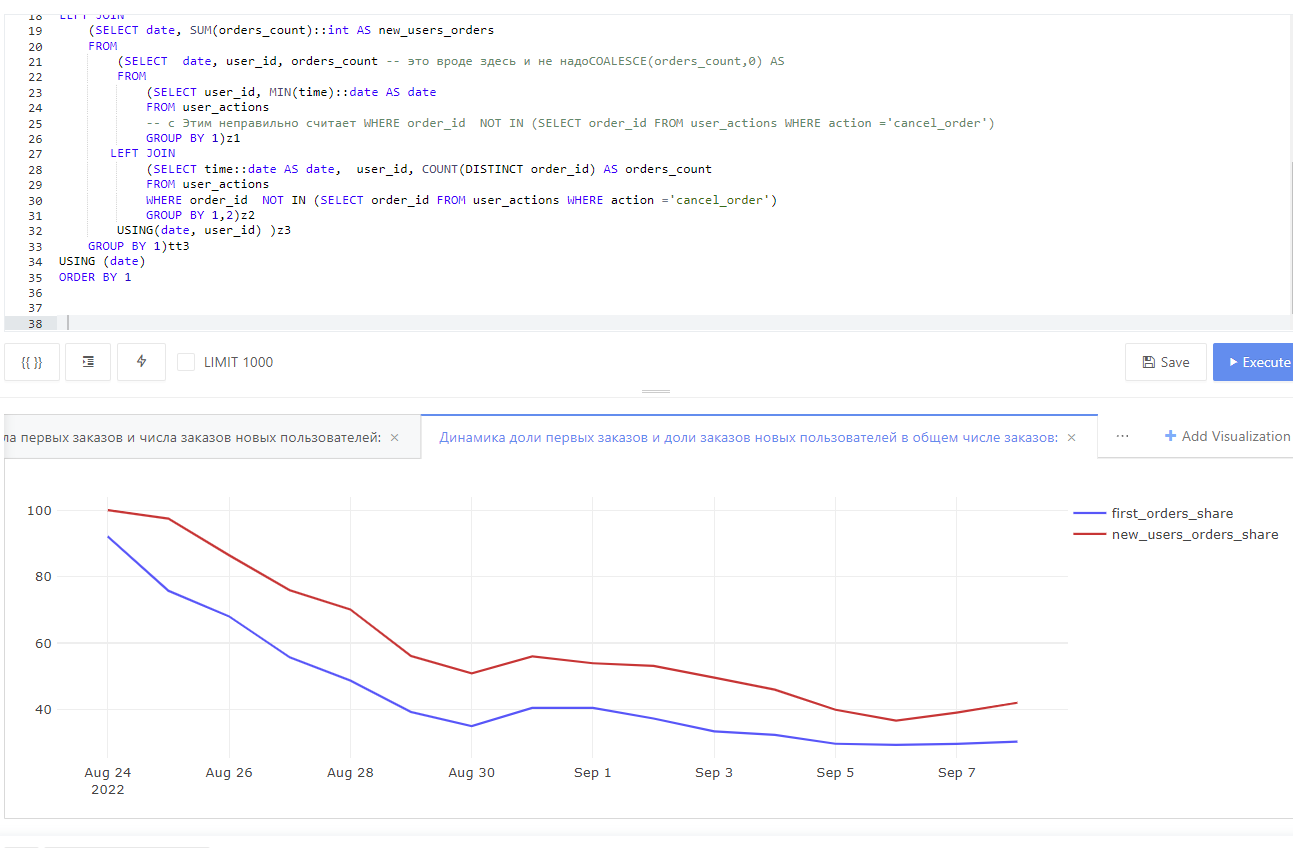

## Задача 6.
Теперь давайте попробуем примерно оценить нагрузку на наших курьеров и узнаем, сколько в среднем заказов и пользователей приходится на каждого из них.

Задание:

На основе данных в таблицах user_actions, courier_actions и orders для каждого дня рассчитайте следующие показатели:

    Число платящих пользователей на одного активного курьера.
    Число заказов на одного активного курьера.
Колонки с показателями назовите соответственно users_per_courier и orders_per_courier. Колонку с датами назовите date. При расчёте показателей округляйте значения до двух знаков после запятой.

Учитывайте только доставленные заказы, отменённые заказы не учитывайте. При расчёте числа курьеров учитывайте только тех, которые в текущий день приняли хотя бы один заказ (который был в последствии доставлен) или доставили любой заказ. При расчёте числа пользователей также учитывайте только тех, кто сделал хотя бы один заказ.

Результирующая таблица должна быть отсортирована по возрастанию даты.

Поля в результирующей таблице: date, users_per_courier, orders_per_courier

Пояснение:

Не забывайте при делении заранее приводить значения к нужному типу данных.

#### Подсказка на случай, если совсем не получается

Для решения задачи сначала необходимо с помощью группировки и агрегации рассчитать количество пользователей, курьеров и заказов на каждую дату, а затем объединить данные в одну таблицу и провести все необходимые расчёты.

После того как составите запрос, попробуйте визуализировать результаты и постройте графики, отражающие динамику рассчитанных показателей.

Можете поместить оба показателя на один график или сделать два разных.




In [ ]:
# МОЕ решение
SELECT date,
    -- paying_users,active_couriers,days_orders,
    ROUND(1.0 * paying_users/active_couriers, 2) AS users_per_courier,
    ROUND(1.0 * days_orders/active_couriers, 2) AS orders_per_courier
FROM
    (SELECT time::date AS date, COUNT(DISTINCT(user_id)) AS paying_users, COUNT(DISTINCT(order_id)) as days_orders
    FROM user_actions
    WHERE action = 'create_order' AND order_id NOT IN (SELECT order_id FROM user_actions WHERE action = 'cancel_order')
    GROUP BY 1)t1
LEFT JOIN   
    (SELECT time::date AS date, COUNT(DISTINCT(courier_id)) AS active_couriers
    FROM courier_actions
    WHERE action = 'accept_order' AND order_id  IN (SELECT order_id FROM courier_actions WHERE action = 'deliver_order') OR action = 'deliver_order'
    GROUP BY 1) t2
USING(date)
ORDER BY 1

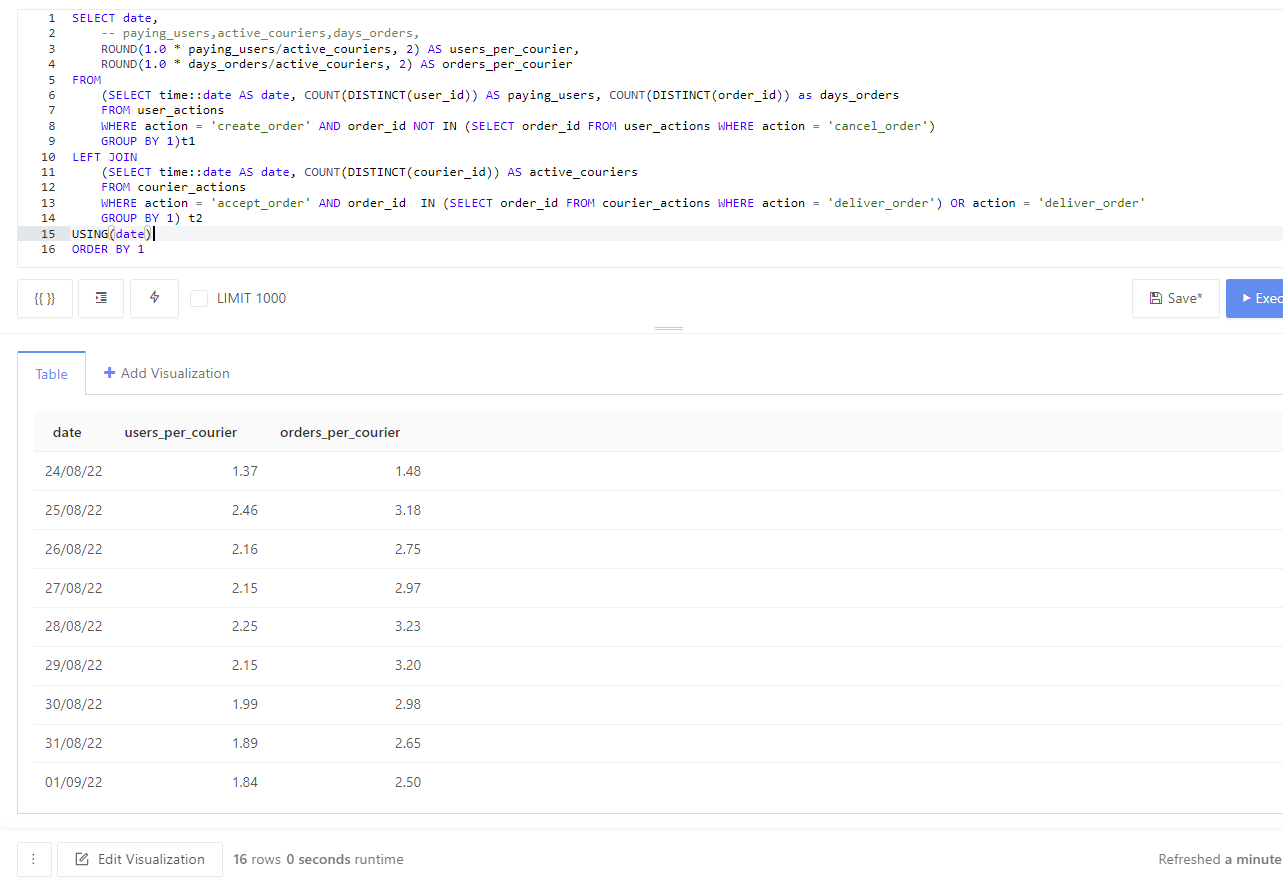

In [ ]:
# вариант подсказка после решения 
SELECT date,
       round(paying_users::decimal / active_couriers, 2) as users_per_courier,
       round(orders::decimal / active_couriers, 2) as orders_per_courier
FROM   (SELECT time::date as date,
               count(distinct courier_id) as active_couriers
        FROM   courier_actions
        WHERE  order_id not in (SELECT order_id
                                FROM   user_actions
                                WHERE  action = 'cancel_order')
        GROUP BY date) t1 join (SELECT creation_time::date as date,
                               count(distinct order_id) as orders
                        FROM   orders
                        WHERE  order_id not in (SELECT order_id
                                                FROM   user_actions
                                                WHERE  action = 'cancel_order')
                           and order_id in (SELECT order_id
                                         FROM   courier_actions
                                         WHERE  action = 'deliver_order')
                        GROUP BY date) t2 using (date) join (SELECT time::date as date,
                                            count(distinct user_id) as paying_users
                                     FROM   user_actions
                                     WHERE  order_id not in (SELECT order_id
                                                             FROM   user_actions
                                                             WHERE  action = 'cancel_order')
                                     GROUP BY date) t3 using (date)
ORDER BY date

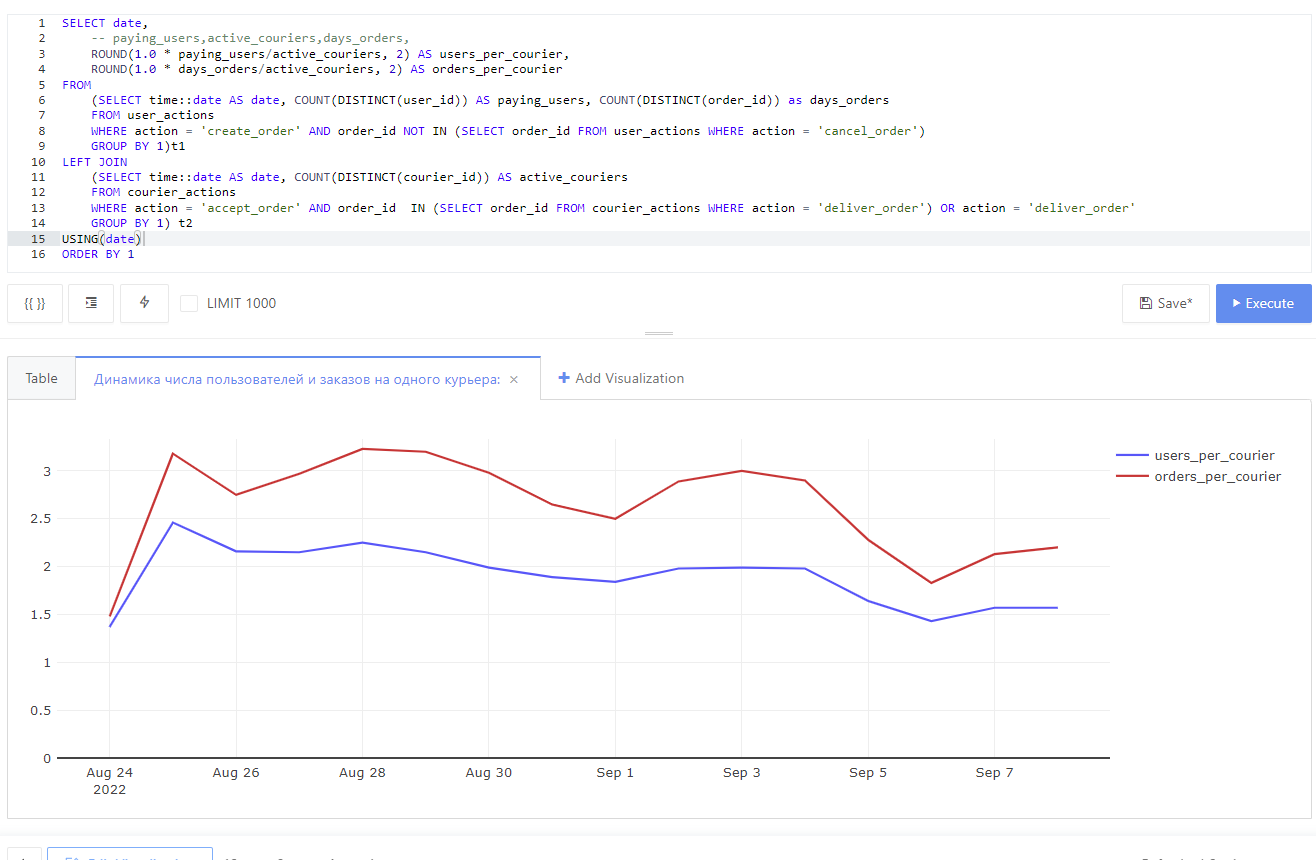

## Задача 7.
Давайте рассчитаем ещё один полезный показатель, характеризующий качество работы курьеров.

Задание:

На основе данных в таблице courier_actions для каждого дня рассчитайте, за сколько минут в среднем курьеры доставляли свои заказы.

Колонку с показателем назовите minutes_to_deliver. Колонку с датами назовите date. При расчёте среднего времени доставки округляйте количество минут до целых значений. Учитывайте только доставленные заказы, отменённые заказы не учитывайте.

Результирующая таблица должна быть отсортирована по возрастанию даты.

Поля в результирующей таблице: date, minutes_to_deliver

Пояснение:

Для решения задачи вам, возможно, придётся вспомнить, как определить количество минут, содержащихся в интервале времени. Мы уже решали похожую задачу на этом шаге.

Некоторые заказы оформляют в один день, а доставляют уже на следующий. При расчёте среднего времени доставки в качестве дней, для которых считать среднее, используйте дни фактической доставки заказов.

##### Подсказка на случай, если совсем не получается

Для решения задачи сначала необходимо с помощью группировки и агрегации для каждого заказа рассчитать время принятия заказа курьером (минимальная отметка времени) и время доставки (максимальная отметка времени), вычислить разницу между этими значениями и с помощью функции EXTRACT извлечь из неё секунды (epoch), переведя их в минуты. Затем можно произвести группировку по дате доставки и вычислить среднее время доставки в каждый из дней.

После того как составите запрос, попробуйте визуализировать результаты и постройте график, отражающий динамику рассчитанного показателя.



In [ ]:
# Мое решение
SELECT time::date AS date, ROUND(AVG(time_sprint)) AS minutes_to_deliver
FROM
    (SELECT order_id, MIN(time) AS start_time, MAX(time) AS finishtime, EXTRACT(epoch FROM (MAX(time)-MIN(time)))/60 AS time_sprint
    FROM courier_actions
    WHERE order_id  NOT IN (SELECT order_id FROM user_actions WHERE action = 'cancel_order')
    GROUP BY 1)z1
JOIN courier_actions
USING(order_id)
GROUP BY 1


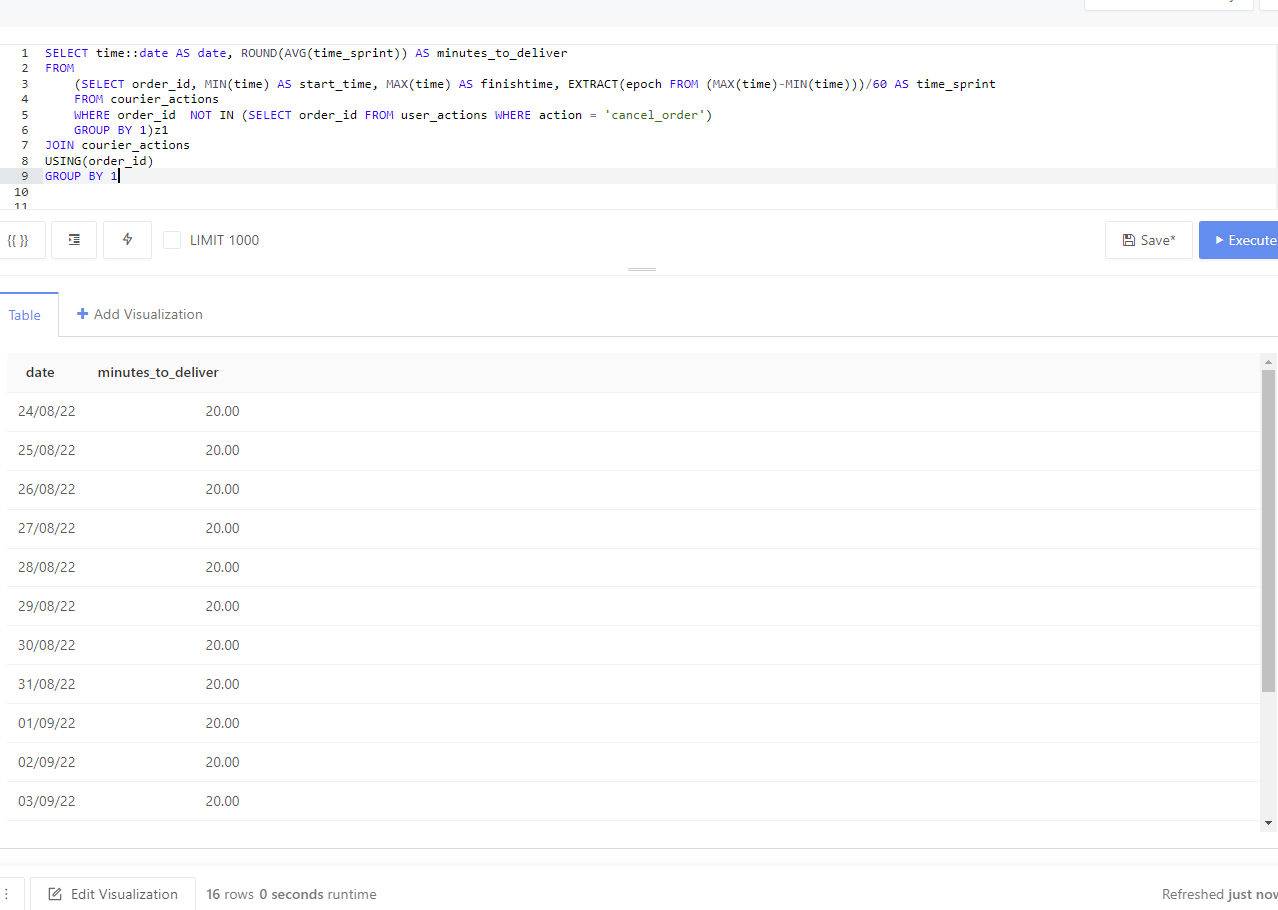

In [2]:
# Подсказка после решения
SELECT date,
       round(avg(delivery_time)) as minutes_to_deliver
FROM   (SELECT order_id,
               max(time::date) as date,
               extract(epoch
        FROM   max(time) - min(time))/60 as delivery_time
        FROM   courier_actions
        WHERE  order_id not in (SELECT order_id
                                FROM   user_actions
                                WHERE  action = 'cancel_order')
        GROUP BY order_id) t
GROUP BY date
ORDER BY date

## Задача 8.
И наконец, давайте оценим почасовую нагрузку на наш сервис, выясним, в какие часы пользователи оформляют больше всего заказов, и заодно проанализируем, как изменяется доля отмен в зависимости от времени оформления заказа.

Задача:

На основе данных в таблице orders для каждого часа в сутках рассчитайте следующие показатели:

    Число успешных (доставленных) заказов.
    Число отменённых заказов.
    Долю отменённых заказов в общем числе заказов (cancel rate).
Колонки с показателями назовите соответственно successful_orders, canceled_orders, cancel_rate. Колонку с часом оформления заказа назовите hour. При расчёте доли отменённых заказов округляйте значения до трёх знаков после запятой.

Результирующая таблица должна быть отсортирована по возрастанию колонки с часом оформления заказа.

Поля в результирующей таблице: hour, successful_orders, canceled_orders, cancel_rate

##### Подсказка на случай, если совсем не получается

Для решения задачи можно сначала с помощью группировки по дате и агрегации отдельно рассчитать количество успешных и отменённых заказов, потом объединить две таблицы в одну по дате и затем рассчитать cancel rate.



###### После того как составите запрос, попробуйте визуализировать результаты и постройте графики, отражающие динамику рассчитанных показателей.

Рекомендуем в этот раз построить комбинированный график, настроив во вкладке Series тип визуализации, подходящий для каждого показателя. Например, для числа успешных и отменённых заказов можно использовать столбиковую диаграмму, а для cancel rate — линейную. Чтобы столбцы были расположены друг над другом, во вкладке General в разделе Stacking можно указать параметр Stack.

In [ ]:
# мое решение Немного намудрил с 3м запросом (лишний)
SELECT hour::int AS hour, successful_orders, canceled_orders,
        ROUND(1.0*canceled_orders/all_orders,3) AS cancel_rate
FROM
    (SELECT DATE_PART('hour',creation_time) AS hour, COUNT(order_id) AS successful_orders
    FROM orders
    WHERE order_id  NOT IN (SELECT order_id FROM user_actions WHERE action = 'cancel_order')
    GROUP BY 1)z1
JOIN
    (SELECT DATE_PART('hour',creation_time) AS hour, COUNT(order_id) AS canceled_orders
    FROM orders
    WHERE order_id  IN (SELECT order_id FROM user_actions WHERE action = 'cancel_order')
    GROUP BY 1)z2
USING(hour)
JOIN
    (SELECT DATE_PART('hour',creation_time) AS hour, COUNT(order_id) AS all_orders
    FROM orders
    GROUP BY 1)z3
USING(hour)   
ORDER BY 1

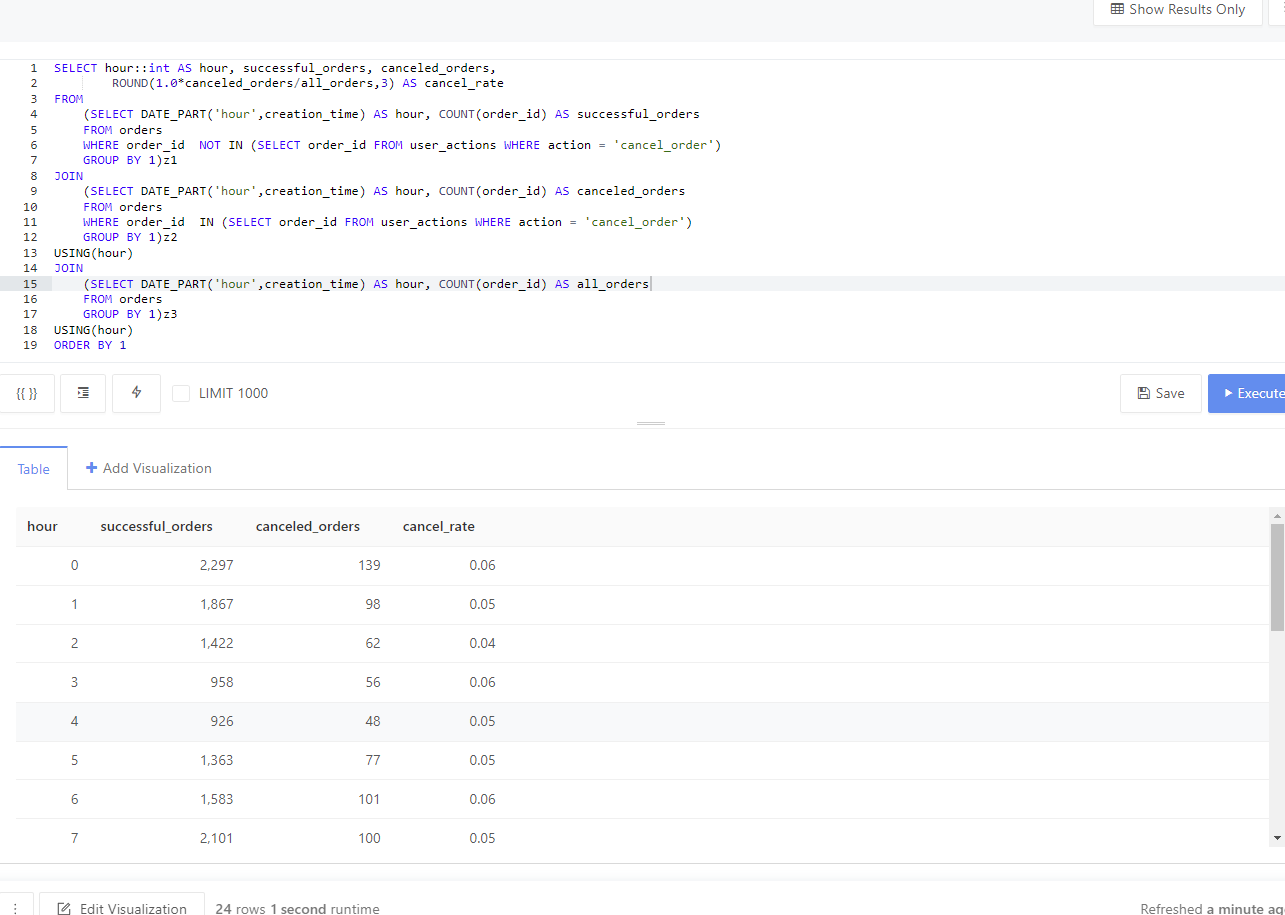

In [1]:
# Подсказка после решения
SELECT hour,
       successful_orders,
       canceled_orders,
       round(canceled_orders::decimal / (successful_orders + canceled_orders),
             3) as cancel_rate
FROM   (SELECT date_part('hour', creation_time)::int as hour,
               count(order_id) as successful_orders
        FROM   orders
        WHERE  order_id not in (SELECT order_id
                                FROM   user_actions
                                WHERE  action = 'cancel_order')
        GROUP BY hour) t1
    LEFT JOIN (SELECT date_part('hour', creation_time)::int as hour,
                      count(order_id) as canceled_orders
               FROM   orders
               WHERE  order_id in (SELECT order_id
                                   FROM   user_actions
                                   WHERE  action = 'cancel_order')
               GROUP BY hour) t2 using (hour)
ORDER BY hour


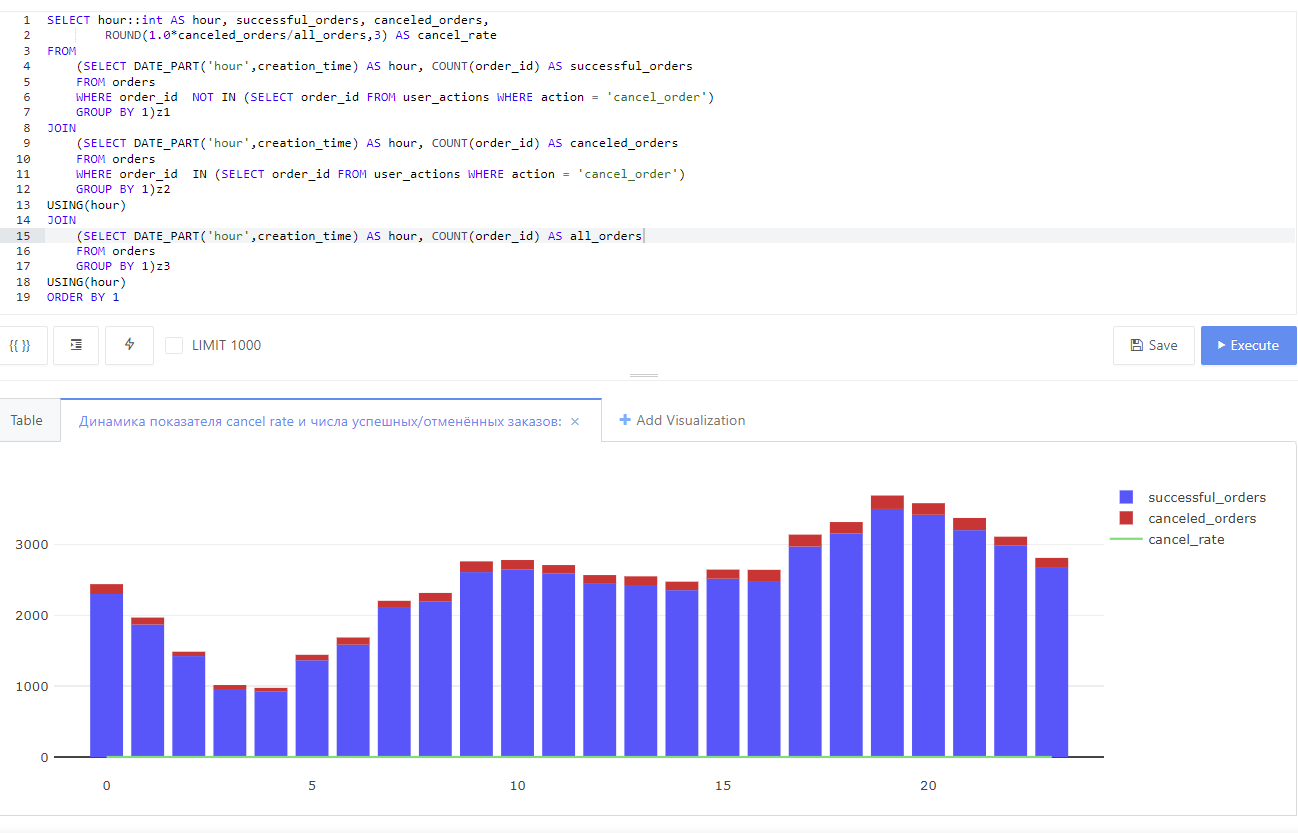

# Построение дашборда
Кажется, мы посчитали уже много разных показателей и построили достаточно графиков, чтобы собрать из них полноценный дашборд!

Построение дашбордов — творческая задача, поэтому мы не будем вас ничем огранивать. Можете придумать свои визуализации, добавить графики из лекции и даже посчитать свои метрики.

Redash полностью в вашем распоряжении!



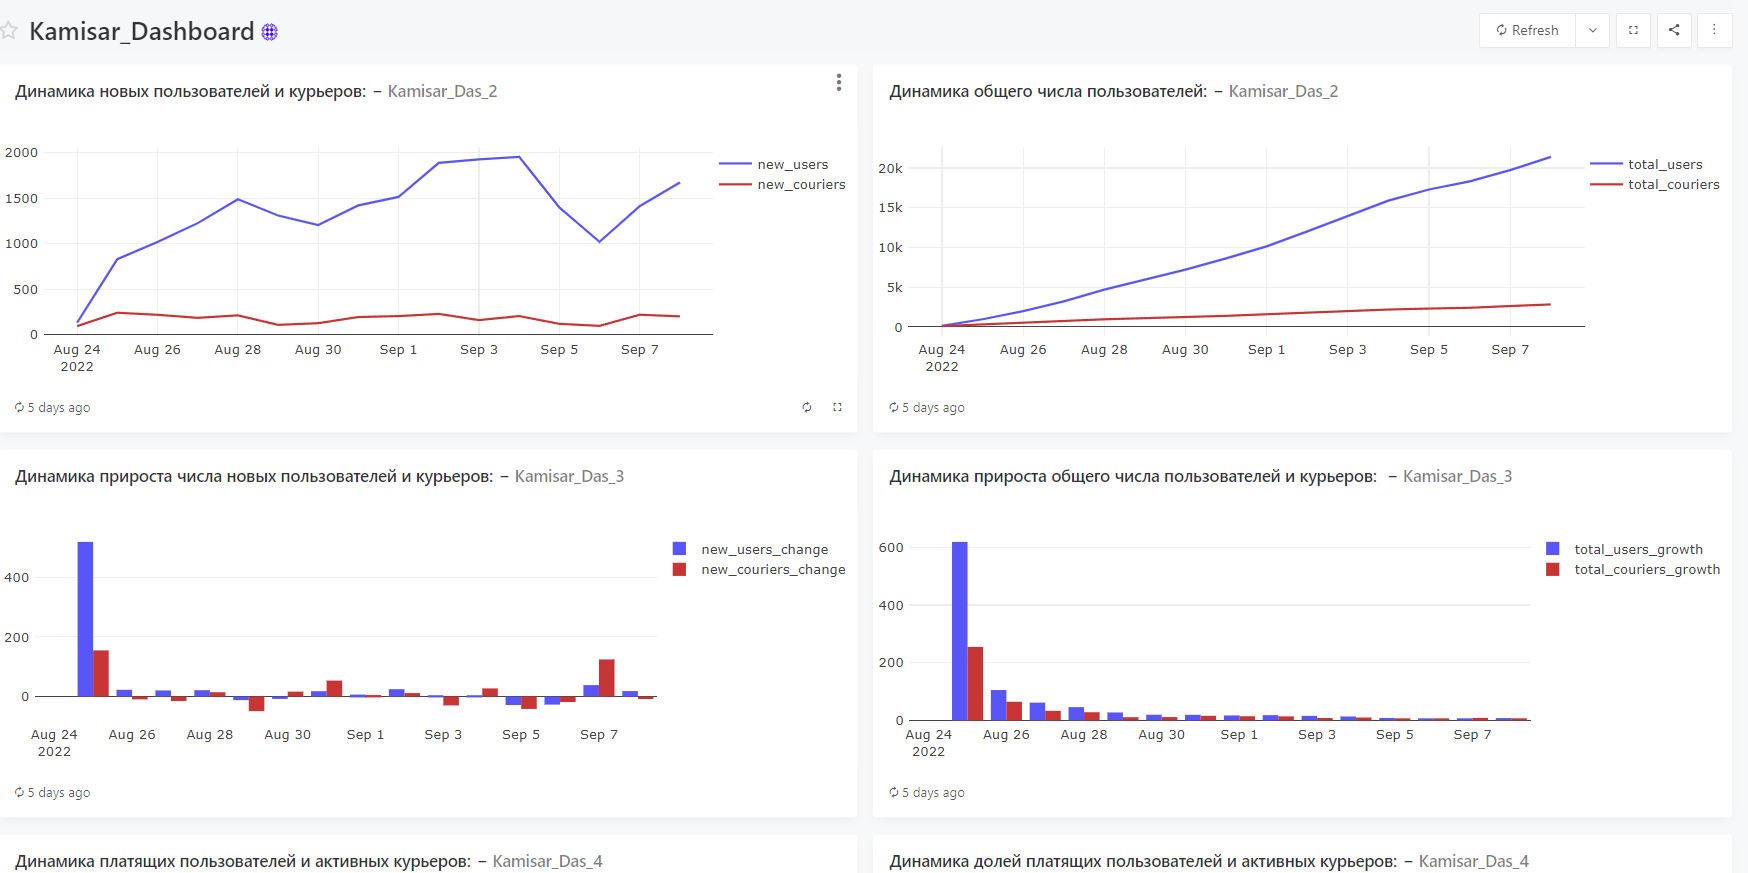

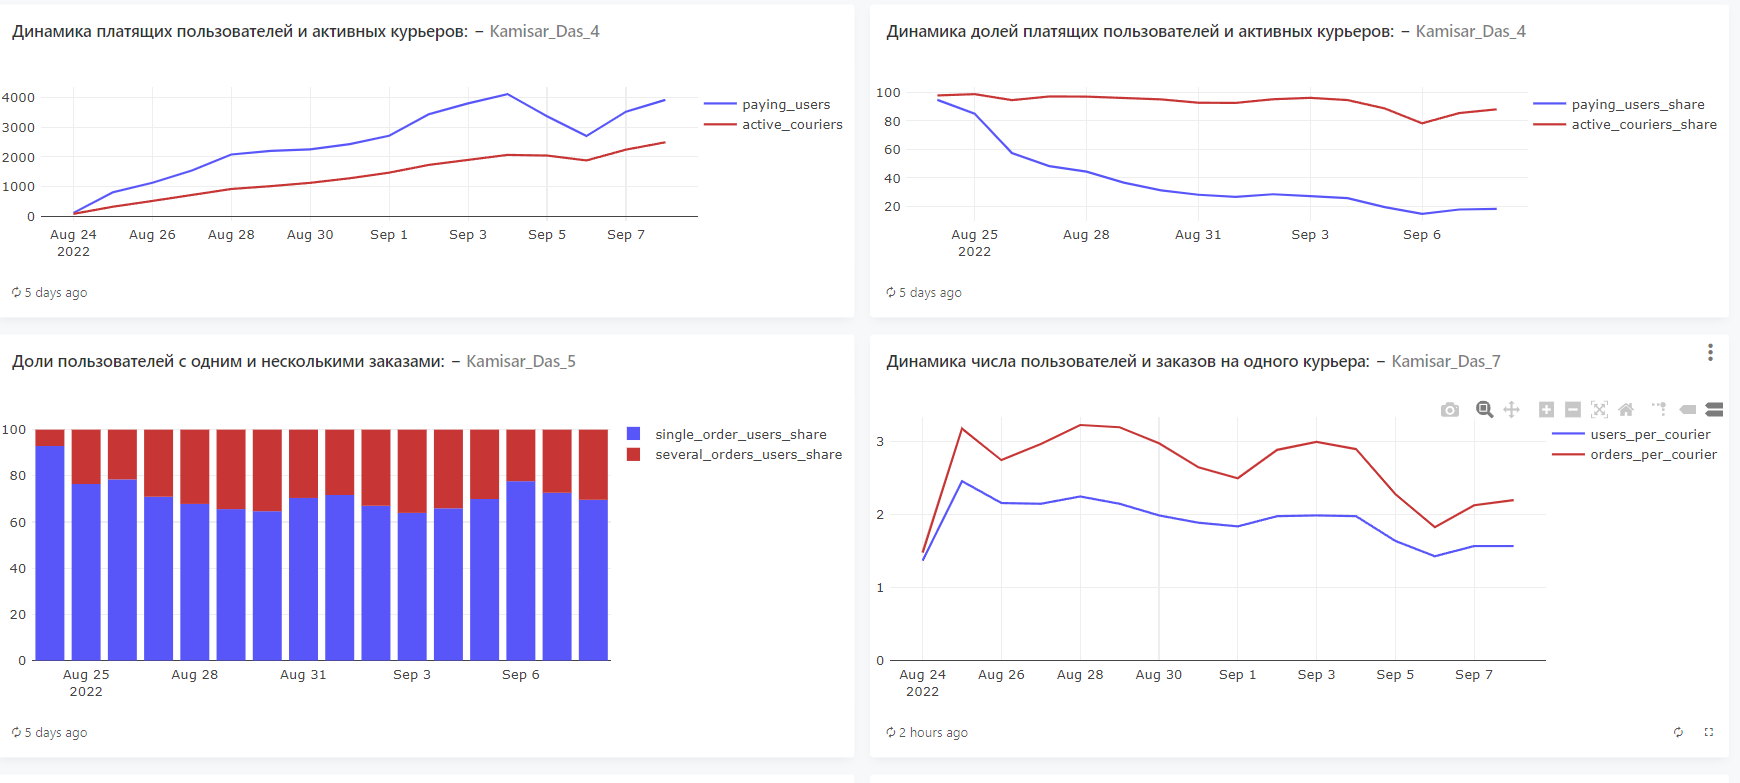

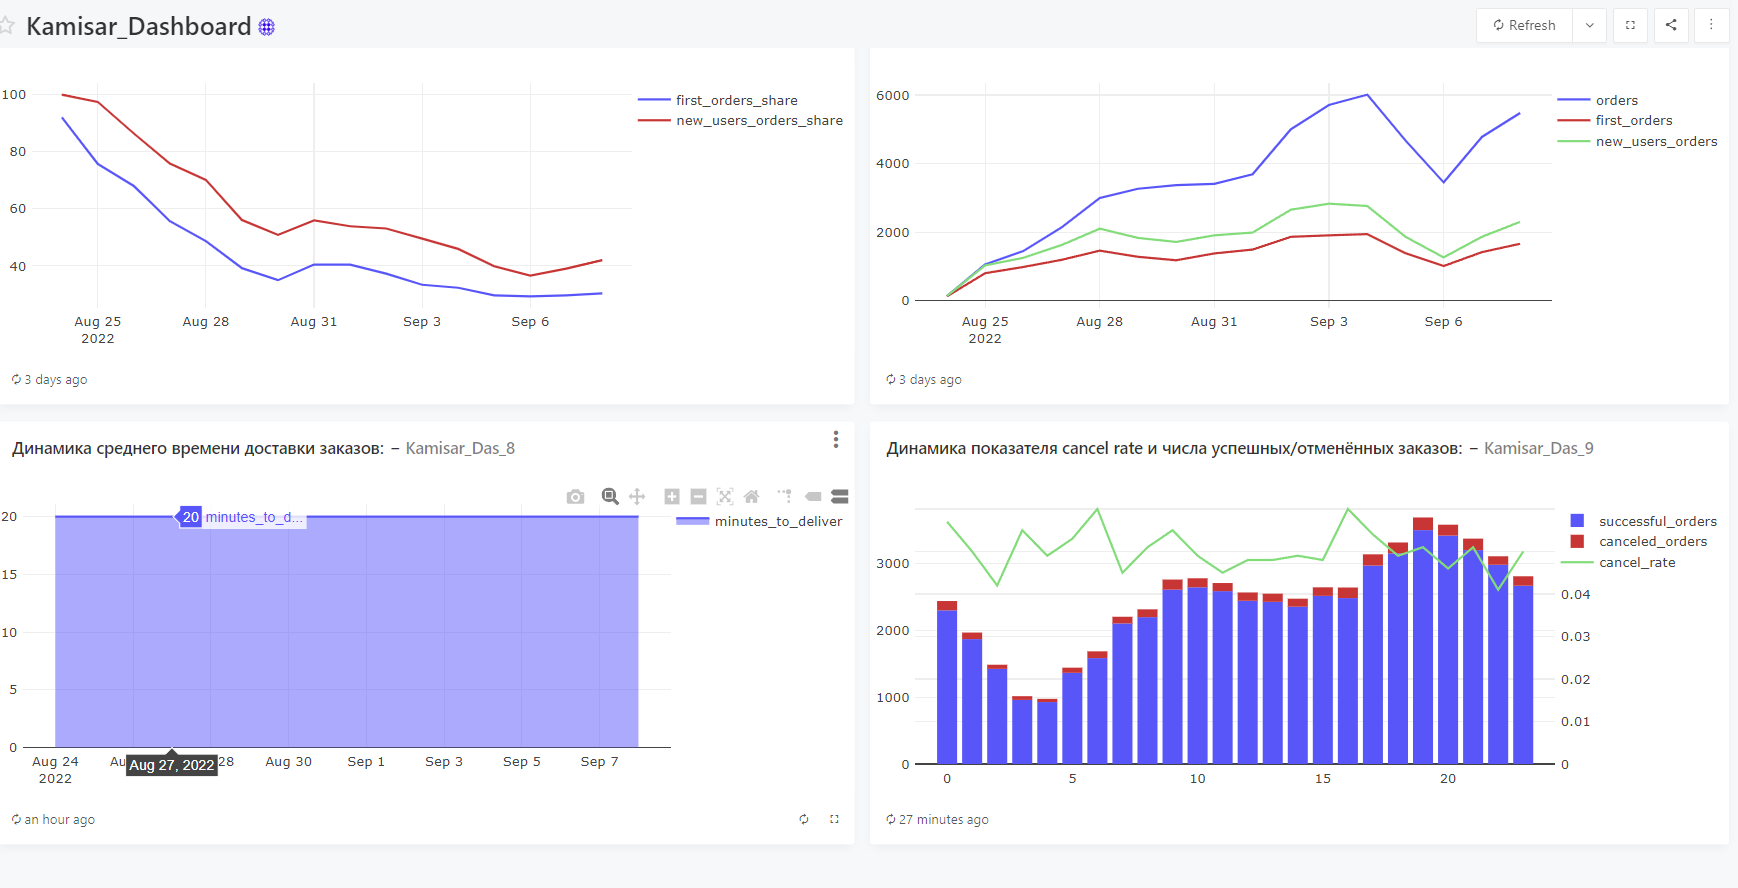